In [1]:
import pandas as pd
import numpy as np
import os
from pybedtools import BedTool
from pybedtools import BedTool
import pybedtools
import csv


import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # Seaborn desaturates matplotlib colors (this is useful if you use both seaborn and basic matplot lib and want colors to be consistent)
import scipy.stats as stats
sns.set(palette='husl', context = 'paper', style='white', font_scale=1)

In [2]:
BASE_PATH = "/".join(os.getcwd().split("/")) # base directory level


#Wynton
# BIN_PATH = os.path.join(BASE_PATH, "bin")  # where my scripts live
# DATA_PATH = os.path.join(BASE_PATH, "data")  # where I dump new data 
# RESULTS_PATH = os.path.join(BASE_PATH, "results")  # where I analyze results

# # Local
RESULTS_PATH = os.path.join(BASE_PATH, "../../../downloads")
DATA_PATH = os.path.join(BASE_PATH, "../../../downloads")  # where I dump new data
COMP_PATH = os.path.join(DATA_PATH,"1KGvsHSMRCA")
FIG_PATH = '/Users/egilbertson/Library/CloudStorage/Box-Box/UCSF/CapraLab/3DGenome/figures/manuscript'


# More divergent than expected

## Set up variants for in silico mutagenesis

```
tabix -R phenotype_enrichment_divergent_from_ancestral/data/divergent_windows.bed /wynton/group/capra/data/wynton_databases/1000_genomes/release/20190312_biallelic_SNV_and_INDEL/ALL.wgs.shapeit2_integrated_snvindels_v2a.GRCh38.27022019.sites.vcf.gz
cd phenotype_enrichment_divergent_from_ancestral/
sed 's/^.\{3\}//' divergent_windows.bed > ../../divergent_windows_strip.bed 
head ../../divergent_windows_strip.bed

  325  head text.txt 
  326  tail text.txt 
  327  mv text.txt variants_in_divergent_windows.vcf
```

In [3]:
# all = pd.read_csv('%s/variants_in_divergent_windows.vcf' % DATA_PATH, comment='#', sep='\t', names = ['chr','pos','id','ref','alt','qual','filter','info'])
# all = all.drop_duplicates()

# info_types = ['AC','AN','DP','AF','EAS_AF','EUR_AF','AFR_AF','AMR_AF','SAS_AF','EX_TARGET','VT','NS']
# splits=all['info'].str.split(';', expand=True)
# splits_11 = splits[splits[11].isnull()]
# splits_12 = splits[~splits[11].isnull()]
# splits_11[11] = splits_11[10]
# splits_11[10] = splits_11[9]
# splits_11[9] = 'NA'
# df = pd.concat([splits_11, splits_12], sort=False).sort_index()

# all[info_types] = df
# all = all.drop(columns=['info'])

In [4]:
# anc = pd.read_csv('%s/tree_sequences/hsmrca_vars_strip.bed' % DATA_PATH, sep='\t', names=['chr','pos','anc','red','rsid'], skiprows=1)

In [5]:
# a = pd.merge(all, anc, on=['chr','pos'], how='left')
# for col in info_types:
#     print(col)
#     if col!='EX_TARGET':
#         tmp = a[col].str.split('=', expand=True)[1]
#         if col == 'VT':
#             a[col] = tmp
#         else:
#             a[col] = tmp.astype(float)

# a.to_csv('ISM_variants_all.txt')

In [3]:
ISM_vars = pd.read_csv('%s/in_silico_mutagenesis/ISM_variants_all.txt' % DATA_PATH, index_col=0)

/var/folders/h7/skbyg_hd0lb0s5rwqt8vxx4r0000gn/T/ipykernel_79966/1585700321.py:1: DtypeWarning: Columns (17,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  ISM_vars = pd.read_csv('%s/in_silico_mutagenesis/ISM_variants_all.txt' % DATA_PATH, index_col=0)


In [4]:
ISM_vars

,chr,pos,id,ref,alt,qual,filter,AC,AN,DP,...,EUR_AF,AFR_AF,AMR_AF,SAS_AF,EX_TARGET,VT,NS,anc,red,rsid
0,1,41418882,.,A,T,.,PASS,46.0,5096.0,20905.0,...,0.0,0.03,0.0,0.00,NaN,SNP,2548.0,A,A,NaN
1,1,41418925,.,A,T,.,PASS,8.0,5096.0,19557.0,...,0.0,0.01,0.0,0.00,NaN,SNP,2548.0,A,A,rs537971100
2,1,41418953,.,C,G,.,PASS,4.0,5096.0,19645.0,...,0.0,0.00,0.0,0.00,NaN,SNP,2548.0,C,C,NaN
3,1,41418962,.,G,A,.,PASS,60.0,5096.0,19662.0,...,0.0,0.00,0.0,0.00,NaN,SNP,2548.0,G,G,rs144016789
4,1,41418972,.,G,A,.,PASS,3.0,5096.0,20012.0,...,0.0,0.00,0.0,0.00,NaN,SNP,2548.0,G,G,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847944,22,49283013,.,A,T,.,PASS,2.0,5096.0,22119.0,...,0.0,0.00,0.0,0.00,NaN,SNP,2548.0,A,A,rs554760475
9847945,22,49283015,.,A,G,.,PASS,2.0,5096.0,22025.0,...,0.0,0.00,0.0,0.00,NaN,SNP,2548.0,A,A,rs573667730
9847946,22,49283054,.,G,C,.,PASS,1.0,5096.0,21858.0,...,0.0,0.00,0.0,0.00,NaN,SNP,2548.0,G,G,rs537573050
9847947,22,49283057,.,G,C,.,PASS,1.0,5096.0,21667.0,...,0.0,0.00,0.0,0.00,NaN,SNP,2548.0,G,G,NaN


In [5]:
ISM_vars.VT.unique()

array(['SNP', 'INDEL'], dtype=object)

In [6]:
ISM_vars_snps = ISM_vars[ISM_vars.VT=='SNP']
ISM_vars_snps=ISM_vars_snps.drop(columns=['id','qual','filter','red','DP','AN','NS','EX_TARGET','VT','AC','rsid'])

In [7]:
ISM_vars_snps

,chr,pos,ref,alt,AF,EAS_AF,EUR_AF,AFR_AF,AMR_AF,SAS_AF,anc
0,1,41418882,A,T,0.01,0.00,0.0,0.03,0.0,0.00,A
1,1,41418925,A,T,0.00,0.00,0.0,0.01,0.0,0.00,A
2,1,41418953,C,G,0.00,0.00,0.0,0.00,0.0,0.00,C
3,1,41418962,G,A,0.01,0.05,0.0,0.00,0.0,0.00,G
4,1,41418972,G,A,0.00,0.00,0.0,0.00,0.0,0.00,G
...,...,...,...,...,...,...,...,...,...,...,...
9847944,22,49283013,A,T,0.00,0.00,0.0,0.00,0.0,0.00,A
9847945,22,49283015,A,G,0.00,0.00,0.0,0.00,0.0,0.00,A
9847946,22,49283054,G,C,0.00,0.00,0.0,0.00,0.0,0.00,G
9847947,22,49283057,G,C,0.00,0.00,0.0,0.00,0.0,0.00,G


In [8]:
def get_non_ancestral_allele(row):
    if row.anc == row.ref:
        non_anc = row.alt
        non_anc_af = float(row.AF)
    elif row.anc == row.alt:
        non_anc = row.ref
        non_anc_af = float(1-row.AF)
    else:
        non_anc="??"
        non_anc_af=np.nan
    return non_anc, non_anc_af

In [9]:
ISM_vars_snps[['non_anc', 'non_anc_af']] = ISM_vars_snps.apply(lambda x: get_non_ancestral_allele(x), axis=1, result_type='expand')

KeyboardInterrupt: 

In [ ]:
ISM_vars_snps

,chr,pos,ref,alt,AF,EAS_AF,EUR_AF,AFR_AF,AMR_AF,SAS_AF,anc,non_anc,non_anc_af
0,1,41418882,A,T,0.01,0.00,0.0,0.03,0.0,0.00,A,T,0.01
1,1,41418925,A,T,0.00,0.00,0.0,0.01,0.0,0.00,A,T,0.00
2,1,41418953,C,G,0.00,0.00,0.0,0.00,0.0,0.00,C,G,0.00
3,1,41418962,G,A,0.01,0.05,0.0,0.00,0.0,0.00,G,A,0.01
4,1,41418972,G,A,0.00,0.00,0.0,0.00,0.0,0.00,G,A,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847944,22,49283013,A,T,0.00,0.00,0.0,0.00,0.0,0.00,A,T,0.00
9847945,22,49283015,A,G,0.00,0.00,0.0,0.00,0.0,0.00,A,G,0.00
9847946,22,49283054,G,C,0.00,0.00,0.0,0.00,0.0,0.00,G,C,0.00
9847947,22,49283057,G,C,0.00,0.00,0.0,0.00,0.0,0.00,G,C,0.00


In [ ]:
ISM_vars_snps[ISM_vars_snps.non_anc_af.astype(float) >=.01]

,chr,pos,ref,alt,AF,EAS_AF,EUR_AF,AFR_AF,AMR_AF,SAS_AF,anc,non_anc,non_anc_af
0,1,41418882,A,T,0.01,0.00,0.00,0.03,0.00,0.00,A,T,0.01
3,1,41418962,G,A,0.01,0.05,0.00,0.00,0.00,0.00,G,A,0.01
9,1,41419069,C,T,0.00,0.01,0.00,0.00,0.00,0.00,T,C,1.00
14,1,41419194,G,A,0.32,0.38,0.46,0.19,0.37,0.27,G,A,0.32
20,1,41419448,G,A,0.02,0.01,0.03,0.00,0.02,0.02,G,A,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847931,22,49282787,C,T,0.17,0.16,0.25,0.02,0.21,0.26,C,T,0.17
9847935,22,49282827,A,G,0.03,0.00,0.00,0.10,0.00,0.00,A,G,0.03
9847939,22,49282856,A,T,0.18,0.16,0.25,0.08,0.21,0.26,A,T,0.18
9847942,22,49282994,C,T,0.02,0.00,0.00,0.08,0.01,0.00,C,T,0.02


In [ ]:
ISM_vars_snps[ISM_vars_snps.non_anc=="??"]

,chr,pos,ref,alt,AF,EAS_AF,EUR_AF,AFR_AF,AMR_AF,SAS_AF,anc,non_anc,non_anc_af
11,1,41419118,G,T,0.00,0.00,0.00,0.00,0.00,0.00,NaN,??,NaN
38,1,41420139,G,A,0.00,0.01,0.00,0.00,0.00,0.00,NaN,??,NaN
45,1,41420455,C,T,0.00,0.00,0.00,0.00,0.00,0.00,NaN,??,NaN
54,1,41420829,C,T,0.04,0.05,0.04,0.03,0.02,0.05,NaN,??,NaN
99,1,41422057,C,G,0.00,0.00,0.00,0.00,0.00,0.00,NaN,??,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847884,22,49281745,C,G,0.00,0.00,0.00,0.00,0.00,0.00,NaN,??,NaN
9847923,22,49282512,C,T,0.01,0.01,0.00,0.00,0.07,0.00,NaN,??,NaN
9847934,22,49282821,G,A,0.00,0.00,0.00,0.00,0.00,0.00,NaN,??,NaN
9847940,22,49282919,T,C,0.04,0.00,0.07,0.01,0.08,0.04,NaN,??,NaN


In [ ]:
ISM_vars_snps_with_ancestral = ISM_vars_snps[~ISM_vars_snps.anc.isnull()]

In [ ]:
ISM_vars_snps_with_ancestral

,chr,pos,ref,alt,AF,EAS_AF,EUR_AF,AFR_AF,AMR_AF,SAS_AF,anc,non_anc,non_anc_af
0,1,41418882,A,T,0.01,0.00,0.0,0.03,0.0,0.00,A,T,0.01
1,1,41418925,A,T,0.00,0.00,0.0,0.01,0.0,0.00,A,T,0.00
2,1,41418953,C,G,0.00,0.00,0.0,0.00,0.0,0.00,C,G,0.00
3,1,41418962,G,A,0.01,0.05,0.0,0.00,0.0,0.00,G,A,0.01
4,1,41418972,G,A,0.00,0.00,0.0,0.00,0.0,0.00,G,A,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847944,22,49283013,A,T,0.00,0.00,0.0,0.00,0.0,0.00,A,T,0.00
9847945,22,49283015,A,G,0.00,0.00,0.0,0.00,0.0,0.00,A,G,0.00
9847946,22,49283054,G,C,0.00,0.00,0.0,0.00,0.0,0.00,G,C,0.00
9847947,22,49283057,G,C,0.00,0.00,0.0,0.00,0.0,0.00,G,C,0.00


In [18]:
ISM_vars_snps_with_ancestral_01 = ISM_vars_snps_with_ancestral[ISM_vars_snps_with_ancestral['AF'] >= 0.01]

In [19]:
ISM_vars_snps_with_ancestral_01

,chr,pos,ref,alt,AF,EAS_AF,EUR_AF,AFR_AF,AMR_AF,SAS_AF,anc,non_anc,non_anc_af
0,1,41418882,A,T,0.01,0.00,0.00,0.03,0.00,0.00,A,T,0.01
3,1,41418962,G,A,0.01,0.05,0.00,0.00,0.00,0.00,G,A,0.01
14,1,41419194,G,A,0.32,0.38,0.46,0.19,0.37,0.27,G,A,0.32
20,1,41419448,G,A,0.02,0.01,0.03,0.00,0.02,0.02,G,A,0.02
26,1,41419654,C,T,0.04,0.00,0.00,0.13,0.02,0.00,C,T,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847931,22,49282787,C,T,0.17,0.16,0.25,0.02,0.21,0.26,C,T,0.17
9847935,22,49282827,A,G,0.03,0.00,0.00,0.10,0.00,0.00,A,G,0.03
9847939,22,49282856,A,T,0.18,0.16,0.25,0.08,0.21,0.26,A,T,0.18
9847942,22,49282994,C,T,0.02,0.00,0.00,0.08,0.01,0.00,C,T,0.02


TODO: Overlap these with the 3D QTLs from Gorkin paper

In [20]:
ISM_vars_snps_with_ancestral_05 = ISM_vars_snps_with_ancestral[ISM_vars_snps_with_ancestral['AF'] >= 0.05]

In [21]:
ISM_vars_snps_with_ancestral_05

,chr,pos,ref,alt,AF,EAS_AF,EUR_AF,AFR_AF,AMR_AF,SAS_AF,anc,non_anc,non_anc_af
14,1,41419194,G,A,0.32,0.38,0.46,0.19,0.37,0.27,G,A,0.32
28,1,41419903,T,A,0.65,0.60,0.50,0.79,0.61,0.70,T,A,0.65
31,1,41419982,G,A,0.62,0.60,0.50,0.68,0.59,0.71,G,A,0.62
34,1,41420026,C,T,0.34,0.40,0.50,0.18,0.39,0.29,T,C,0.66
69,1,41421235,A,G,0.05,0.01,0.03,0.11,0.03,0.02,A,G,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847899,22,49282160,C,T,0.29,0.47,0.27,0.11,0.20,0.40,C,T,0.29
9847907,22,49282246,C,A,0.07,0.00,0.07,0.14,0.09,0.04,C,A,0.07
9847931,22,49282787,C,T,0.17,0.16,0.25,0.02,0.21,0.26,C,T,0.17
9847939,22,49282856,A,T,0.18,0.16,0.25,0.08,0.21,0.26,A,T,0.18


In [22]:
ISM_vars_snps_with_ancestral_1 = ISM_vars_snps_with_ancestral[ISM_vars_snps_with_ancestral['AF'] >= 0.1]
ISM_vars_snps_with_ancestral_1['pos+1'] = ISM_vars_snps_with_ancestral_1['pos'] + 1

/scratch/egilbertson/ipykernel_17434/1918218116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ISM_vars_snps_with_ancestral_1['pos+1'] = ISM_vars_snps_with_ancestral_1['pos'] + 1


In [23]:
ISM_vars_snps_with_ancestral_1

,chr,pos,ref,alt,AF,EAS_AF,EUR_AF,AFR_AF,AMR_AF,SAS_AF,anc,non_anc,non_anc_af,pos+1
14,1,41419194,G,A,0.32,0.38,0.46,0.19,0.37,0.27,G,A,0.32,41419195
28,1,41419903,T,A,0.65,0.60,0.50,0.79,0.61,0.70,T,A,0.65,41419904
31,1,41419982,G,A,0.62,0.60,0.50,0.68,0.59,0.71,G,A,0.62,41419983
34,1,41420026,C,T,0.34,0.40,0.50,0.18,0.39,0.29,T,C,0.66,41420027
82,1,41421729,A,G,1.00,1.00,1.00,0.99,1.00,1.00,G,A,0.00,41421730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847891,22,49281890,G,A,0.29,0.47,0.27,0.12,0.20,0.41,G,A,0.29,49281891
9847899,22,49282160,C,T,0.29,0.47,0.27,0.11,0.20,0.40,C,T,0.29,49282161
9847931,22,49282787,C,T,0.17,0.16,0.25,0.02,0.21,0.26,C,T,0.17,49282788
9847939,22,49282856,A,T,0.18,0.16,0.25,0.08,0.21,0.26,A,T,0.18,49282857


In [4]:
windows_to_keep = pd.read_csv('%s/intermediates/windows_to_keep.csv' % DATA_PATH, index_col=0)
windows_to_keep['windowStopPos'] = windows_to_keep['windowStartPos'] + 2**20


In [5]:

windows_to_keep = pd.read_csv('%s/intermediates/windows_to_keep.csv' % DATA_PATH, index_col=0)
windows_to_keep['windowStopPos'] = windows_to_keep['windowStartPos'] + 2**20
window_bed = pybedtools.BedTool('%s/divergent_windows_strip.bed' % DATA_PATH)
#vars_bed = pybedtools.BedTool.from_dataframe(ISM_vars_snps_with_ancestral_1[['chr','pos','pos+1','anc','non_anc']])


In [11]:
overlap = vars_bed.intersect(window_bed, wao=True).to_dataframe(names=['var_chrm','var_pos','var_pos+1','anc','non_anc','window_chrm','window_start','window_stop','overlap'])
overlap['var_chrm'] = 'chr' + overlap['var_chrm'].astype('str')
overlap = overlap[['var_chrm','var_pos','anc','non_anc','window_start']]

NameError: name 'vars_bed' is not defined

In [12]:
overlap.to_csv('%s/in_silico_mutagenesis/variants_in_divergent_windows_10AF.txt' % DATA_PATH, sep='\t', header=False, index=False)

NameError: name 'overlap' is not defined

In [13]:
overlap.shape[0]

NameError: name 'overlap' is not defined

In [29]:
overlap[overlap.var_pos == 60816904]

,var_chrm,var_pos,anc,non_anc,window_start
179451,chr4,60816904,T,C,60293120


In [30]:
overlap.iloc[179448: 179455]

,var_chrm,var_pos,anc,non_anc,window_start
179448,chr4,60812281,C,A,60293120
179449,chr4,60814216,A,T,60293120
179450,chr4,60816777,C,T,60293120
179451,chr4,60816904,T,C,60293120
179452,chr4,60817408,T,C,60817408
179453,chr4,60817408,T,C,60293120
179454,chr4,60817841,C,T,60817408


In [31]:
ISM_vars_snps_with_ancestral_1[ISM_vars_snps_with_ancestral_1.non_anc=="??"]

,chr,pos,ref,alt,AF,EAS_AF,EUR_AF,AFR_AF,AMR_AF,SAS_AF,anc,non_anc,non_anc_af,pos+1
128148,1,93336657,G,C,0.84,0.98,0.79,0.66,0.86,0.97,T,??,NaN,93336658
2218692,3,194312746,C,G,0.11,0.02,0.00,0.38,0.05,0.01,T,??,NaN,194312747
4573237,7,88630833,G,A,0.10,0.21,0.14,0.01,0.11,0.08,T,??,NaN,88630834
6157907,11,72947756,C,G,1.00,1.00,1.00,0.99,1.00,1.00,A,??,NaN,72947757
6630964,12,104922476,G,T,0.11,0.24,0.04,0.11,0.09,0.06,A,??,NaN,104922477


In [32]:
ISM_vars_snps_with_ancestral_1[ISM_vars_snps_with_ancestral_1.pos==60816904]

,chr,pos,ref,alt,AF,EAS_AF,EUR_AF,AFR_AF,AMR_AF,SAS_AF,anc,non_anc,non_anc_af,pos+1
2412422,4,60816904,T,C,0.1,0.02,0.15,0.14,0.08,0.09,T,C,0.1,60816905


In [41]:
a = list(range(0,622860, 500))

In [42]:
b = list(range(500,622860, 500))
b.append(622860)

In [43]:
len(b)

1246

In [44]:
len(a)

1246

In [45]:

with open('%s/in_silico_mutagenesis/ISM_splits_idw_rare_alternate.txt' % DATA_PATH, 'w+') as f:
    writer = csv.writer(f, delimiter='\t')
    for row in zip(a, b):
        writer.writerow(row)

In [43]:
vars_bed.to_dataframe()

,chrom,start,end,name,score
0,1,41419194,41419195,G,A
1,1,41419903,41419904,T,A
2,1,41419982,41419983,G,A
3,1,41420026,41420027,T,C
4,1,41421729,41421730,G,A
...,...,...,...,...,...
616217,22,49281890,49281891,G,A
616218,22,49282160,49282161,C,T
616219,22,49282787,49282788,C,T
616220,22,49282856,49282857,A,T


In [44]:
window_bed.to_dataframe()

,chrom,start,end
0,1,41418752,42467328
1,1,57147392,58195968
2,1,70778880,71827456
3,1,88604672,89653248
4,1,92798976,93847552
...,...,...,...
387,21,35127296,36175872
388,22,22020096,23068672
389,22,22544384,23592960
390,22,47710208,48758784


## load in mutagenesis files and set up dictionary data structure

run in command line for bash script
```
head -n 1 divergent_windows_10AF_variants_1.txt > divergent_windows_10AF_variants.txt
for i in {1..1444}; do tail -n +2 divergent_windows_10AF_variants_$i.txt >> div.tmp; done
sort -k1,1 -k2n,2 div.tmp >> divergent_windows_10AF_variants.txt
rm div.tmp
```

In [3]:
ism = pd.read_table('%s/in_silico_mutagenesis/divergent_windows/divergent_windows_10AF_variants.txt' % DATA_PATH)
# ancestral 3D dataframes
anc_spear = pd.read_table('%s/comp_tables/anc_window_spearman.csv' % RESULTS_PATH
                    , sep=',', header=[0,1,2,3], index_col=[0,1])
anc_div = 1-anc_spear


windows_to_keep = pd.read_csv('%s/intermediates/windows_to_keep.csv' % DATA_PATH, index_col=0)
windows_to_keep['windowStopPos'] = windows_to_keep['windowStartPos'] + 2**20
window_bed = pybedtools.BedTool('%s/divergent_windows_strip.bed' % DATA_PATH)


In [4]:
ism

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman
0,chr1,41419194,41418752,G,A,4.010169e-10,1.528952e-09,2.227691e-09
1,chr1,41419903,41418752,T,A,6.424570e-10,2.430540e-09,4.395940e-09
2,chr1,41419982,41418752,G,A,2.975184e-10,9.618393e-10,2.712017e-09
3,chr1,41420026,41418752,T,C,1.394818e-10,4.707098e-10,1.339220e-09
4,chr1,41421729,41418752,G,A,1.894821e-10,7.112624e-10,1.574174e-09
...,...,...,...,...,...,...,...,...
721717,chr9,125819519,124780544,C,G,6.015042e-09,1.393339e-08,1.644450e-08
721718,chr9,125821620,124780544,G,A,2.798776e-09,6.660611e-09,1.031697e-08
721719,chr9,125824208,124780544,A,T,2.335459e-10,5.788691e-10,1.391949e-09
721720,chr9,125824786,124780544,C,T,2.315557e-09,5.479565e-09,6.564956e-09


In [5]:
div_windows = window_bed.to_dataframe()[['chrom','start']]
window_tuples = list(div_windows.itertuples(index=False, name=None))
emp = pd.read_table('%s/divergent_windows_exp_distributions.txt' % DATA_PATH, sep=',', index_col=[0,1])

In [6]:
ism_dict = dict.fromkeys(emp.index)

In [7]:
ism_dict.keys()

dict_keys([('chr1', 41418752), ('chr1', 57147392), ('chr1', 70778880), ('chr1', 88604672), ('chr1', 92798976), ('chr1', 96993280), ('chr1', 97517568), ('chr1', 106430464), ('chr1', 110100480), ('chr1', 120061952), ('chr1', 122683392), ('chr1', 123207680), ('chr1', 123731968), ('chr1', 147324928), ('chr1', 152043520), ('chr1', 152567808), ('chr1', 159907840), ('chr1', 160432128), ('chr1', 168820736), ('chr1', 169345024), ('chr1', 172490752), ('chr1', 176685056), ('chr1', 177209344), ('chr1', 187170816), ('chr1', 190316544), ('chr1', 192937984), ('chr1', 193462272), ('chr1', 193986560), ('chr1', 207093760), ('chr1', 246415360), ('chr2', 13107200), ('chr2', 13631488), ('chr2', 14680064), ('chr2', 17825792), ('chr2', 27262976), ('chr2', 27787264), ('chr2', 28835840), ('chr2', 35127296), ('chr2', 35651584), ('chr2', 44040192), ('chr2', 44564480), ('chr2', 48234496), ('chr2', 49807360), ('chr2', 50331648), ('chr2', 53477376), ('chr2', 57147392), ('chr2', 57671680), ('chr2', 70778880), ('chr2

In [8]:
emp.loc[('chr1', 41418752)]

ttest_stat         -26.987165
ttest_pval                0.0
obs_mean             0.011143
exp_mean              0.00319
obs/exp              3.492743
obs-exp              0.007953
-log10(p)          142.835091
direction              higher
sig                      True
numWindowsAbove             2
numWindowsBelow             3
ALL                  0.011143
AFR                  0.010108
EUR                   0.01183
EAS                   0.01318
SAS                  0.011994
AMR                  0.008076
min                  0.000214
max                  0.061708
emp_min               0.00024
emp_max               0.04716
Name: (chr1, 41418752), dtype: object

In [9]:
anc_div.loc[('chr1', 41418752)].max()

0.061707916989559575

In [10]:
anc_div

AFR                                          \
                           ACB                                           
                        female                                           
                       HG01880   HG01883   HG01886   HG01889   HG01894   
chr   windowStartPos                                                     
chr1  1048576         0.000982  0.001551  0.001609  0.001618  0.003944   
      1572864         0.001445  0.001657  0.001909  0.001959  0.004272   
      3145728         0.001283  0.000683  0.002624  0.002458  0.002041   
      3670016         0.005119  0.004878  0.001901  0.002729  0.004874   
      4194304         0.008681  0.007497  0.004502  0.004731  0.011335   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.007145  0.001892  0.002877  0.008396  0.004389   
      47185920        0.027227  0.006835  0.003085  0.035391  0.003696   
      47710208        0.039303  0.045497  0.065454  0.123312  0.028221   
      48234496        0.183482  0.189969  0.241011  0.325763  0.195117   
      48758784        0.005628  0.014172  0.002837  0.015048  0.012794   

                                                                        ...  \
                                                                        ...   
                                                                        ...   
                       HG01896   HG01915   HG01956   HG01958   HG01985  ...   
chr   windowStartPos                                                    ...   
chr1  1048576         0.002145  0.001217  0.000658  0.002693  0.002143  ...   
      1572864         0.002573  0.001838  0.002096  0.006768  0.002917  ...   
      3145728         0.002661  0.000521  0.002490  0.003151  0.002294  ...   
      3670016         0.001535  0.004503  0.004706  0.004062  0.006236  ...   
      4194304         0.006836  0.007988  0.010622  0.007037  0.014604  ...   
...                        ...       ...       ...       ...       ...  ...   
chr22 46661632        0.002007  0.003275  0.006965  0.002858  0.006226  ...   
      47185920        0.007332  0.002898  0.017533  0.005524  0.002682  ...   
      47710208        0.040250  0.046180  0.030846  0.038820  0.033115  ...   
      48234496        0.174392  0.179873  0.198540  0.168733  0.161755  ...   
      48758784        0.003188  0.005283  0.012890  0.003300  0.013330  ...   

                           SAS                                          \
                           STU                                           
                          male                                           
                       HG03998   HG03999   HG04003   HG04006   HG04033   
chr   windowStartPos                                                     
chr1  1048576         0.000387  0.000713  0.000919  0.000718  0.000841   
      1572864         0.001048  0.000703  0.001067  0.000496  0.001208   
      3145728         0.003141  0.004537  0.000520  0.000528  0.001665   
      3670016         0.005861  0.006603  0.004933  0.004321  0.004428   
      4194304         0.009956  0.011672  0.013004  0.005318  0.008290   
...                        ...       ...       ...       ...       ...   
chr22 46661632        0.003228  0.002667  0.003284  0.002222  0.001290   
      47185920        0.007095  0.003824  0.004329  0.003580  0.003119   
      47710208        0.037299  0.045959  0.036592  0.034629  0.043876   
      48234496        0.166427  0.189953  0.157409  0.160880  0.186454   
      48758784        0.005060  0.005483  0.003194  0.004617  0.005598   

                                                                        
                                                                        
                                                                        
                       HG04039   HG04100   HG04107   HG04210   HG04229  
chr   windowStartPos                                                    
chr1  1048576         0.000

In [11]:
max_divs = []
all_percs = []
for i in ism_dict.keys():
    max_o = anc_div.loc[i].max()
    chr = i[0]
    window = i[1]
    arry = ism[ism.chr==chr][ism.window==window]
    arry['percent_of_max_observed'] = arry['1-spearman']/max_o
    max_divs.append(arry['1-spearman'].max())
    ism_dict[i] = arry
    all_percs = all_percs + list(arry['percent_of_max_observed'])

/var/folders/h7/skbyg_hd0lb0s5rwqt8vxx4r0000gn/T/ipykernel_28182/2230328556.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arry = ism[ism.chr==chr][ism.window==window]
/var/folders/h7/skbyg_hd0lb0s5rwqt8vxx4r0000gn/T/ipykernel_28182/2230328556.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arry = ism[ism.chr==chr][ism.window==window]
/var/folders/h7/skbyg_hd0lb0s5rwqt8vxx4r0000gn/T/ipykernel_28182/2230328556.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arry = ism[ism.chr==chr][ism.window==window]
/var/folders/h7/skbyg_hd0lb0s5rwqt8vxx4r0000gn/T/ipykernel_28182/2230328556.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arry = ism[ism.chr==chr][ism.window==window]
/var/folders/h7/skbyg_hd0lb0s5rwqt8vxx4r0000gn/T/ipykernel_28182/2230328556.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  arry = ism[ism.chr==

In [12]:
ism

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman
0,chr1,41419194,41418752,G,A,4.010169e-10,1.528952e-09,2.227691e-09
1,chr1,41419903,41418752,T,A,6.424570e-10,2.430540e-09,4.395940e-09
2,chr1,41419982,41418752,G,A,2.975184e-10,9.618393e-10,2.712017e-09
3,chr1,41420026,41418752,T,C,1.394818e-10,4.707098e-10,1.339220e-09
4,chr1,41421729,41418752,G,A,1.894821e-10,7.112624e-10,1.574174e-09
...,...,...,...,...,...,...,...,...
721717,chr9,125819519,124780544,C,G,6.015042e-09,1.393339e-08,1.644450e-08
721718,chr9,125821620,124780544,G,A,2.798776e-09,6.660611e-09,1.031697e-08
721719,chr9,125824208,124780544,A,T,2.335459e-10,5.788691e-10,1.391949e-09
721720,chr9,125824786,124780544,C,T,2.315557e-09,5.479565e-09,6.564956e-09


In [13]:
all_percs

[3.6100572687315266e-08,
 7.123785990269975e-08,
 4.394926163037874e-08,
 2.170255941931522e-08,
 2.551008005354474e-08,
 7.005537039788266e-08,
 9.433477409357883e-09,
 3.479463214610916e-08,
 3.509237662936457e-08,
 3.037763049234916e-08,
 5.2859693176586566e-08,
 8.316816043090283e-08,
 5.240541113835767e-09,
 4.422432952417036e-08,
 3.909275622352592e-09,
 6.809140754995686e-08,
 3.504574784730071e-09,
 5.400067070515027e-09,
 3.975269463368731e-08,
 1.6756472128458032e-08,
 1.542250610057489e-08,
 1.0883109156434879e-07,
 3.219971910423107e-07,
 1.498352896107587e-07,
 5.527385937118985e-08,
 3.912667395318091e-08,
 1.654396024426812e-07,
 3.7641143243481825e-07,
 1.2723563161019955e-06,
 1.5620835580811685e-07,
 0.00035939151014894775,
 3.578651505709642e-07,
 3.567983505342287e-07,
 1.5305448912459165e-07,
 1.8840338900491709e-06,
 2.6225881425032355e-07,
 1.0626550318125592e-06,
 3.8379495083446126e-07,
 1.3980391596127033e-07,
 3.4913097895149297e-06,
 4.7319044385250667e-07,


In [14]:
arry

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman,percent_of_max_observed
427796,chr22,48237421,48234496,A,T,4.438659e-10,7.412495e-09,6.707550e-09,1.936371e-08
427798,chr22,48237817,48234496,T,C,4.000753e-10,6.627718e-09,5.150825e-09,1.486968e-08
427800,chr22,48238411,48234496,T,C,8.939167e-10,1.435870e-08,1.246882e-08,3.599565e-08
427802,chr22,48239149,48234496,G,C,5.705385e-09,9.134697e-08,4.275704e-08,1.234333e-07
427804,chr22,48239474,48234496,A,G,2.117566e-08,3.224275e-07,2.104907e-07,6.076556e-07
...,...,...,...,...,...,...,...,...,...
433808,chr22,49281890,48234496,G,A,4.770842e-10,8.065142e-09,1.722946e-08,4.973891e-08
433809,chr22,49282160,48234496,C,T,3.236197e-11,5.029821e-10,1.729698e-09,4.993385e-09
433810,chr22,49282787,48234496,C,T,1.657518e-09,2.681234e-08,6.368712e-08,1.838554e-07
433811,chr22,49282856,48234496,A,T,2.621071e-11,4.014075e-10,1.398813e-09,4.038167e-09


In [15]:
ism_dict[('chr1',
  41418752)]['percent_of_max_observed']

0       3.610057e-08
1       7.123786e-08
2       4.394926e-08
3       2.170256e-08
4       2.551008e-08
            ...     
1741    2.085315e-08
1742    1.163570e-08
1743    1.569188e-08
1744    6.708690e-08
1745    1.684230e-09
Name: percent_of_max_observed, Length: 1746, dtype: float64

In [16]:
import statistics
statistics.median(all_percs)

1.5454790824413317e-06

Text(0, 0.5, 'Number of windows')

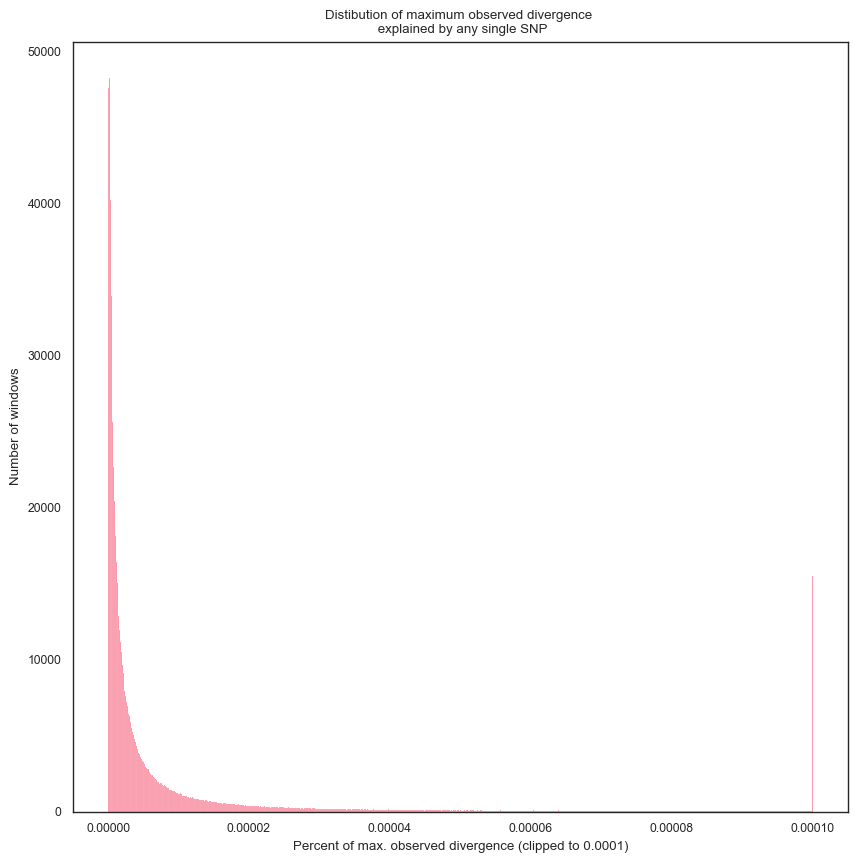

In [17]:
all_percs = np.array(all_percs).clip(0,.00010)

plt.figure(figsize=(10,10))
sns.histplot(all_percs)
plt.title('Distibution of maximum observed divergence \n explained by any single SNP')
plt.xlabel('Percent of max. observed divergence (clipped to 0.0001)')
plt.ylabel('Number of windows')

In [18]:
ism_dict.keys()

dict_keys([('chr1', 41418752), ('chr1', 57147392), ('chr1', 70778880), ('chr1', 88604672), ('chr1', 92798976), ('chr1', 96993280), ('chr1', 97517568), ('chr1', 106430464), ('chr1', 110100480), ('chr1', 120061952), ('chr1', 122683392), ('chr1', 123207680), ('chr1', 123731968), ('chr1', 147324928), ('chr1', 152043520), ('chr1', 152567808), ('chr1', 159907840), ('chr1', 160432128), ('chr1', 168820736), ('chr1', 169345024), ('chr1', 172490752), ('chr1', 176685056), ('chr1', 177209344), ('chr1', 187170816), ('chr1', 190316544), ('chr1', 192937984), ('chr1', 193462272), ('chr1', 193986560), ('chr1', 207093760), ('chr1', 246415360), ('chr2', 13107200), ('chr2', 13631488), ('chr2', 14680064), ('chr2', 17825792), ('chr2', 27262976), ('chr2', 27787264), ('chr2', 28835840), ('chr2', 35127296), ('chr2', 35651584), ('chr2', 44040192), ('chr2', 44564480), ('chr2', 48234496), ('chr2', 49807360), ('chr2', 50331648), ('chr2', 53477376), ('chr2', 57147392), ('chr2', 57671680), ('chr2', 70778880), ('chr2

In [19]:
emp['max_ism_div'] = max_divs

In [20]:
emp['max_obs_div'] = anc_div.loc[emp.index].max(axis=1)
emp['med_obs_div'] = anc_div.loc[emp.index].median(axis=1)
#emp['max_obs_div'] = anc_div.loc[emp.index].max(axis=1)

Text(0.5, 1.0, 'Maximum 3D divergence per window')

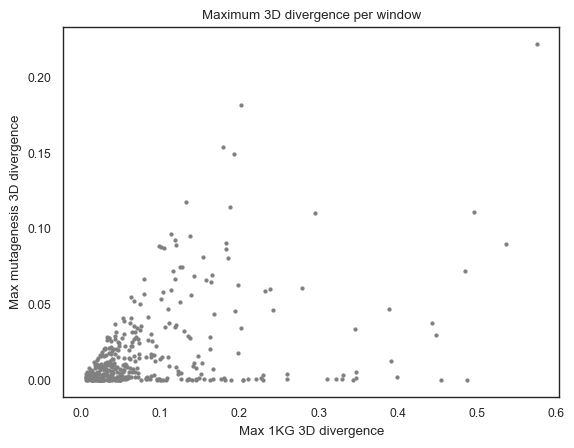

In [21]:
plt.scatter(emp['max_obs_div'], emp['max_ism_div'], s=5, color='grey')
plt.xlabel('Max 1KG 3D divergence')
plt.ylabel('Max mutagenesis 3D divergence')
plt.title('Maximum 3D divergence per window')

Text(0.5, 1.0, 'Maximum 3D divergence per window')

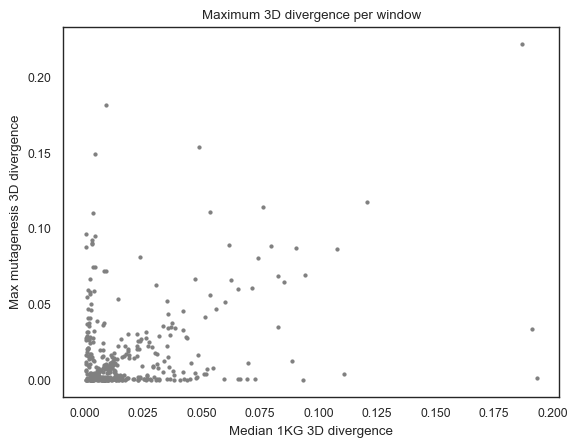

In [22]:
plt.scatter(emp['med_obs_div'], emp['max_ism_div'], s=5, color='grey')
plt.xlabel('Median 1KG 3D divergence')
plt.ylabel('Max mutagenesis 3D divergence')
plt.title('Maximum 3D divergence per window')

In [23]:
emp['percent_of_max'] = emp['max_ism_div'] / emp['max_obs_div']
emp['percent_of_med'] = emp['max_ism_div'] / emp['med_obs_div']

Text(0.5, 0, 'Percent of maximum observed divergence')

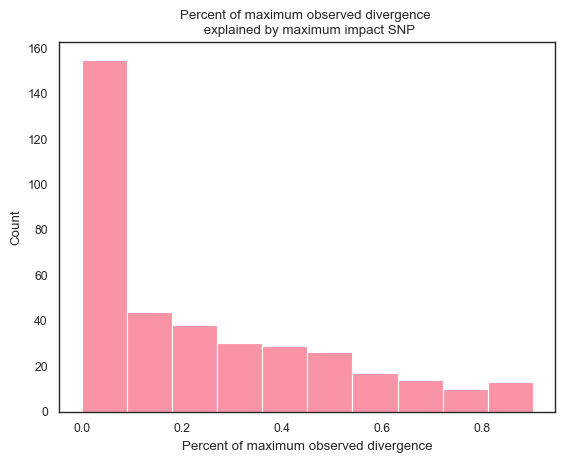

In [24]:
sns.histplot(emp['percent_of_max'])
plt.title('Percent of maximum observed divergence \n explained by maximum impact SNP')
plt.xlabel('Percent of maximum observed divergence')

Text(0.5, 1.0, 'x axis cut off at 2, (maximum is ~152)')

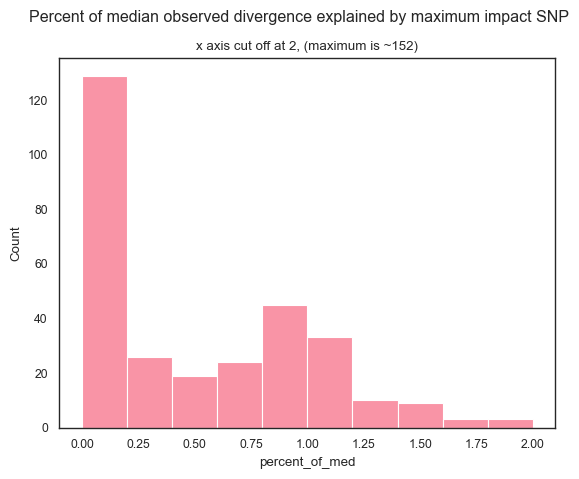

In [25]:
sns.histplot(emp['percent_of_med'], binrange=(0,2))
plt.suptitle('Percent of median observed divergence explained by maximum impact SNP')
plt.title('x axis cut off at 2, (maximum is ~152)')

(array([155.,  44.,  38.,  30.,  29.,  26.,  17.,  14.,  10.,  13.]),
 array([1.31100009e-04, 9.01676492e-02, 1.80204198e-01, 2.70240748e-01,
        3.60277297e-01, 4.50313846e-01, 5.40350395e-01, 6.30386944e-01,
        7.20423494e-01, 8.10460043e-01, 9.00496592e-01]),
 <BarContainer object of 10 artists>)

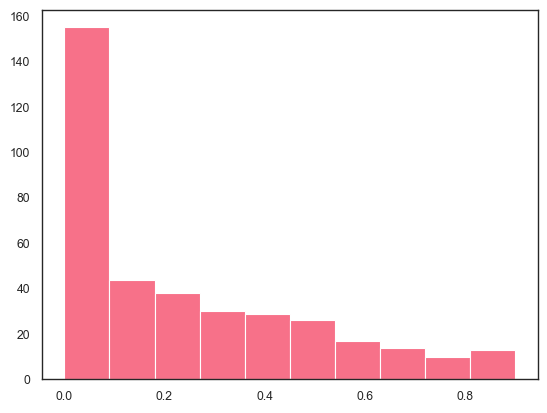

In [26]:
plt.hist(emp['percent_of_max'], align = 'mid')

(array([155.,  44.,  38.,  30.,  29.,  26.,  17.,  14.,  10.,  13.]),
 array([1.31100009e-04, 9.01676492e-02, 1.80204198e-01, 2.70240748e-01,
        3.60277297e-01, 4.50313846e-01, 5.40350395e-01, 6.30386944e-01,
        7.20423494e-01, 8.10460043e-01, 9.00496592e-01]),
 <BarContainer object of 10 artists>)

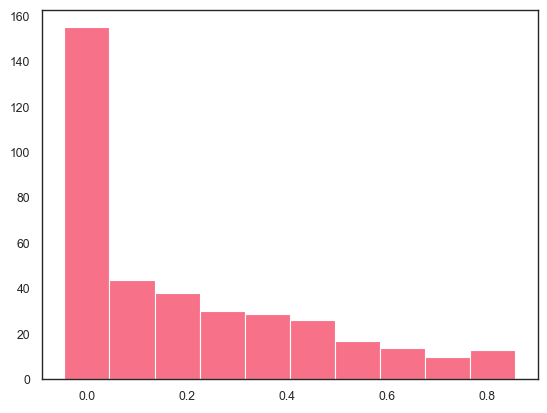

In [27]:
plt.hist(emp['percent_of_max'], align = 'left')

In [28]:
emp[emp['percent_of_max']<0.1]

ttest_stat     ttest_pval  obs_mean  exp_mean   obs/exp  \
chr   windowStartPos                                                            
chr1  92798976        -16.384539   8.147811e-58  0.071182  0.008426  8.447434   
      106430464       -20.666954   9.817385e-89  0.013965  0.006234  2.240309   
      110100480       -26.108568  2.257583e-135  0.009964  0.004829  2.063183   
      120061952        -7.052330   2.182453e-12  0.002328  0.001298  1.793939   
      152043520       -45.319568   0.000000e+00  0.051961  0.007777  6.681739   
...                          ...            ...       ...       ...       ...   
chr20 59244544        -10.815473   9.169119e-27  0.014787  0.010467  1.412757   
chr21 13631488         -7.540231   6.205784e-14  0.013233  0.007863  1.682857   
      35127296         -8.395653   7.093248e-17  0.030532  0.022997  1.327648   
chr22 47710208        -26.485256  7.297025e-139  0.055388  0.020211  2.740559   
      48234496        -55.442420   0.000000e+00  0.204145  0.035823  5.698711   

                       obs-exp   -log10(p) direction   sig  numWindowsAbove  \
chr   windowStartPos                                                          
chr1  92798976        0.062755   57.088959    higher  True                0   
      106430464       0.007732   88.008004    higher  True                0   
      110100480       0.005134  134.646356    higher  True                0   
      120061952       0.001030   11.661055    higher  True                0   
      152043520       0.044184         inf    higher  True               22   
...                        ...         ...       ...   ...              ...   
chr20 59244544        0.004320   26.037672    higher  True                0   
chr21 13631488        0.005369   13.207203    higher  True                0   
      35127296        0.007535   16.149155    higher  True                0   
chr22 47710208        0.035178  138.136854    higher  True                0   
      48234496        0.168322         inf    higher  True              367   

                      ...       AMR       min       max   emp_min   emp_max  \
chr   windowStartPos  ...                                                     
chr1  92798976        ...  0.074693  0.000381  0.260017  0.000371  0.454930   
      106430464       ...  0.015260  0.000625  0.049274  0.000250  0.091242   
      110100480       ...  0.010114  0.000285  0.049853  0.000280  0.066433   
      120061952       ...  0.002256  0.000062  0.015981  0.000072  0.062373   
      152043520       ...  0.052692  0.000652  0.126266  0.000266  0.084214   
...                   ...       ...       ...       ...       ...       ...   
chr20 59244544        ...  0.014196  0.000433  0.043586  0.000450  0.207628   
chr21 13631488        ...  0.012646  0.000350  0.059167  0.000428  0.191239   
      35127296        ...  0.030236  0.008522  0.120146  0.001044  0.323117   
chr22 47710208        ...  0.059584  0.001600  0.142327  0.001173  0.203276   
      48234496        ...  0.219469  0.002814  0.346398  0.002023  0.280502   

                      max_ism_div  max_obs_div  med_obs_div  percent_of_max  \
chr   windowStartPos                                                          
chr1  92798976           0.000728     0.260017     0.001733        0.002798   
      106430464          0.003432     0.049274     0.016905        0.069644   
      110100480          0.000085     0.049853     0.010095        0.001712   
      120061952          0.000002     0.015981     0.001433        0.000131   
      152043520          0.004766     0.126266     0.047323        0.037748   
...                           ...          ...          ...             ...   
chr20 59244544           0.000820     0.043586     0.014846        0.018804   
chr21 13631488           0.002845     0.059167     0.004565        0.048092   
      35127296           0.008852     0.120146     0.029215        0.073674   
chr22 47710208           0.011125     0.142

In [29]:
159/392

0.40561224489795916

In [30]:
emp

ttest_stat     ttest_pval  obs_mean  exp_mean   obs/exp  \
chr   windowStartPos                                                            
chr1  41418752        -26.987165  1.461871e-143  0.011143  0.003190  3.492743   
      57147392        -11.867927   9.060743e-32  0.021517  0.007885  2.728665   
      70778880         -5.334215   1.032114e-07  0.003761  0.002849  1.319976   
      88604672        -17.578602   7.272380e-66  0.014955  0.002522  5.929643   
      92798976        -16.384539   8.147811e-58  0.071182  0.008426  8.447434   
...                          ...            ...       ...       ...       ...   
chr21 35127296         -8.395653   7.093248e-17  0.030532  0.022997  1.327648   
chr22 22020096        -10.467888   3.332675e-25  0.023887  0.017606  1.356793   
      22544384         -9.387509   1.188089e-20  0.011776  0.007743  1.520958   
      47710208        -26.485256  7.297025e-139  0.055388  0.020211  2.740559   
      48234496        -55.442420   0.000000e+00  0.204145  0.035823  5.698711   

                       obs-exp   -log10(p) direction   sig  numWindowsAbove  \
chr   windowStartPos                                                          
chr1  41418752        0.007953  142.835091    higher  True                2   
      57147392        0.013631   31.042836    higher  True                1   
      70778880        0.000912    6.986272    higher  True                0   
      88604672        0.012433   65.138323    higher  True                7   
      92798976        0.062755   57.088959    higher  True                0   
...                        ...         ...       ...   ...              ...   
chr21 35127296        0.007535   16.149155    higher  True                0   
chr22 22020096        0.006282   24.477207    higher  True                0   
      22544384        0.004034   19.925151    higher  True                0   
      47710208        0.035178  138.136854    higher  True                0   
      48234496        0.168322         inf    higher  True              367   

                      ...       AMR       min       max   emp_min   emp_max  \
chr   windowStartPos  ...                                                     
chr1  41418752        ...  0.008076  0.000214  0.061708  0.000240  0.047160   
      57147392        ...  0.036207  0.000460  0.241914  0.000711  0.198873   
      70778880        ...  0.003891  0.000125  0.015220  0.000125  0.071377   
      88604672        ...  0.014783  0.000098  0.068938  0.000080  0.055810   
      92798976        ...  0.074693  0.000381  0.260017  0.000371  0.454930   
...                   ...       ...       ...       ...       ...       ...   
chr21 35127296        ...  0.030236  0.008522  0.120146  0.001044  0.323117   
chr22 22020096        ...  0.022474  0.001957  0.055087  0.001038  0.190579   
      22544384        ...  0.009572  0.000380  0.032310  0.000370  0.141347   
      47710208        ...  0.059584  0.001600  0.142327  0.001173  0.203276   
      48234496        ...  0.219469  0.002814  0.346398  0.002023  0.280502   

                      max_ism_div  max_obs_div  med_obs_div  percent_of_max  \
chr   windowStartPos                                                          
chr1  41418752           0.013818     0.061708     0.013622        0.223924   
      57147392           0.046179     0.241914     0.002589        0.190889   
      70778880           0.004463     0.015220     0.003781        0.293259   
      88604672           0.028706     0.068938     0.000810        0.416400   
      92798976           0.000728     0.260017     0.001733        0.002798   
...                           ...          ...          ...             ...   
chr21 35127296           0.008852     0.120146     0.029215        0.073674   
chr22 22020096           0.009399     0.055087     0.024408        0.170624   
      22544384           0.006354     0.032310     0.012853        0.196670   
      47710208           0.011125     0.142

(array([155.,  44.,  38.,  30.,  29.,  26.,  17.,  14.,  10.,  13.]),
 array([1.31100009e-04, 9.01676492e-02, 1.80204198e-01, 2.70240748e-01,
        3.60277297e-01, 4.50313846e-01, 5.40350395e-01, 6.30386944e-01,
        7.20423494e-01, 8.10460043e-01, 9.00496592e-01]),
 <BarContainer object of 10 artists>)

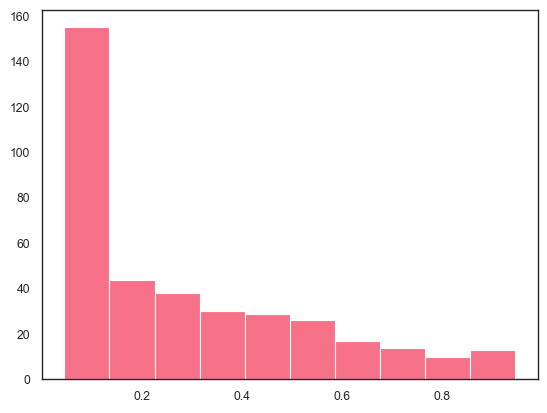

In [31]:
plt.hist(emp['percent_of_max'], align = 'right')

In [32]:
1835000800 + 2**20

1836049376

## Additive effects

In [33]:
ism_dict[('chr1',
  41418752)]['1-spearman'].sum()

0.015445614110028547

In [34]:
emp

ttest_stat     ttest_pval  obs_mean  exp_mean   obs/exp  \
chr   windowStartPos                                                            
chr1  41418752        -26.987165  1.461871e-143  0.011143  0.003190  3.492743   
      57147392        -11.867927   9.060743e-32  0.021517  0.007885  2.728665   
      70778880         -5.334215   1.032114e-07  0.003761  0.002849  1.319976   
      88604672        -17.578602   7.272380e-66  0.014955  0.002522  5.929643   
      92798976        -16.384539   8.147811e-58  0.071182  0.008426  8.447434   
...                          ...            ...       ...       ...       ...   
chr21 35127296         -8.395653   7.093248e-17  0.030532  0.022997  1.327648   
chr22 22020096        -10.467888   3.332675e-25  0.023887  0.017606  1.356793   
      22544384         -9.387509   1.188089e-20  0.011776  0.007743  1.520958   
      47710208        -26.485256  7.297025e-139  0.055388  0.020211  2.740559   
      48234496        -55.442420   0.000000e+00  0.204145  0.035823  5.698711   

                       obs-exp   -log10(p) direction   sig  numWindowsAbove  \
chr   windowStartPos                                                          
chr1  41418752        0.007953  142.835091    higher  True                2   
      57147392        0.013631   31.042836    higher  True                1   
      70778880        0.000912    6.986272    higher  True                0   
      88604672        0.012433   65.138323    higher  True                7   
      92798976        0.062755   57.088959    higher  True                0   
...                        ...         ...       ...   ...              ...   
chr21 35127296        0.007535   16.149155    higher  True                0   
chr22 22020096        0.006282   24.477207    higher  True                0   
      22544384        0.004034   19.925151    higher  True                0   
      47710208        0.035178  138.136854    higher  True                0   
      48234496        0.168322         inf    higher  True              367   

                      ...       AMR       min       max   emp_min   emp_max  \
chr   windowStartPos  ...                                                     
chr1  41418752        ...  0.008076  0.000214  0.061708  0.000240  0.047160   
      57147392        ...  0.036207  0.000460  0.241914  0.000711  0.198873   
      70778880        ...  0.003891  0.000125  0.015220  0.000125  0.071377   
      88604672        ...  0.014783  0.000098  0.068938  0.000080  0.055810   
      92798976        ...  0.074693  0.000381  0.260017  0.000371  0.454930   
...                   ...       ...       ...       ...       ...       ...   
chr21 35127296        ...  0.030236  0.008522  0.120146  0.001044  0.323117   
chr22 22020096        ...  0.022474  0.001957  0.055087  0.001038  0.190579   
      22544384        ...  0.009572  0.000380  0.032310  0.000370  0.141347   
      47710208        ...  0.059584  0.001600  0.142327  0.001173  0.203276   
      48234496        ...  0.219469  0.002814  0.346398  0.002023  0.280502   

                      max_ism_div  max_obs_div  med_obs_div  percent_of_max  \
chr   windowStartPos                                                          
chr1  41418752           0.013818     0.061708     0.013622        0.223924   
      57147392           0.046179     0.241914     0.002589        0.190889   
      70778880           0.004463     0.015220     0.003781        0.293259   
      88604672           0.028706     0.068938     0.000810        0.416400   
      92798976           0.000728     0.260017     0.001733        0.002798   
...                           ...          ...          ...             ...   
chr21 35127296           0.008852     0.120146     0.029215        0.073674   
chr22 22020096           0.009399     0.055087     0.024408        0.170624   
      22544384           0.006354     0.032310     0.012853        0.196670   
      47710208           0.011125     0.142

In [35]:
additive = []
for w in ism_dict.keys():
    additive.append(ism_dict[w]['1-spearman'].sum())

In [36]:
emp['ism_sum'] = additive

In [37]:
emp['additive_percent_of_max'] = emp['ism_sum'] / emp['max_obs_div']

In [38]:
emp

ttest_stat     ttest_pval  obs_mean  exp_mean   obs/exp  \
chr   windowStartPos                                                            
chr1  41418752        -26.987165  1.461871e-143  0.011143  0.003190  3.492743   
      57147392        -11.867927   9.060743e-32  0.021517  0.007885  2.728665   
      70778880         -5.334215   1.032114e-07  0.003761  0.002849  1.319976   
      88604672        -17.578602   7.272380e-66  0.014955  0.002522  5.929643   
      92798976        -16.384539   8.147811e-58  0.071182  0.008426  8.447434   
...                          ...            ...       ...       ...       ...   
chr21 35127296         -8.395653   7.093248e-17  0.030532  0.022997  1.327648   
chr22 22020096        -10.467888   3.332675e-25  0.023887  0.017606  1.356793   
      22544384         -9.387509   1.188089e-20  0.011776  0.007743  1.520958   
      47710208        -26.485256  7.297025e-139  0.055388  0.020211  2.740559   
      48234496        -55.442420   0.000000e+00  0.204145  0.035823  5.698711   

                       obs-exp   -log10(p) direction   sig  numWindowsAbove  \
chr   windowStartPos                                                          
chr1  41418752        0.007953  142.835091    higher  True                2   
      57147392        0.013631   31.042836    higher  True                1   
      70778880        0.000912    6.986272    higher  True                0   
      88604672        0.012433   65.138323    higher  True                7   
      92798976        0.062755   57.088959    higher  True                0   
...                        ...         ...       ...   ...              ...   
chr21 35127296        0.007535   16.149155    higher  True                0   
chr22 22020096        0.006282   24.477207    higher  True                0   
      22544384        0.004034   19.925151    higher  True                0   
      47710208        0.035178  138.136854    higher  True                0   
      48234496        0.168322         inf    higher  True              367   

                      ...       max   emp_min   emp_max  max_ism_div  \
chr   windowStartPos  ...                                              
chr1  41418752        ...  0.061708  0.000240  0.047160     0.013818   
      57147392        ...  0.241914  0.000711  0.198873     0.046179   
      70778880        ...  0.015220  0.000125  0.071377     0.004463   
      88604672        ...  0.068938  0.000080  0.055810     0.028706   
      92798976        ...  0.260017  0.000371  0.454930     0.000728   
...                   ...       ...       ...       ...          ...   
chr21 35127296        ...  0.120146  0.001044  0.323117     0.008852   
chr22 22020096        ...  0.055087  0.001038  0.190579     0.009399   
      22544384        ...  0.032310  0.000370  0.141347     0.006354   
      47710208        ...  0.142327  0.001173  0.203276     0.011125   
      48234496        ...  0.346398  0.002023  0.280502     0.033887   

                      max_obs_div  med_obs_div  percent_of_max  \
chr   windowStartPos                                             
chr1  41418752           0.061708     0.013622        0.223924   
      57147392           0.241914     0.002589        0.190889   
      70778880           0.015220     0.003781        0.293259   
      88604672           0.068938     0.000810        0.416400   
      92798976           0.260017     0.001733        0.002798   
...                           ...          ...             ...   
chr21 35127296           0.120146     0.029215        0.073674   
chr22 22020096           0.055087     0.024408        0.170624   
      22544384           0.032310     0.012853        0.196670   
      47710208           0.142327     0.045310        0.078165   
      48234496           0.346398     0.191353        0.097826   

                      percent_of_med   ism_sum  additive_percent_of_max  
chr   windowStartPos                                                  

In [39]:
df = emp[['percent_of_max', 'additive_percent_of_max']]
df = df.melt(value_vars=['percent_of_max', 'additive_percent_of_max'])

In [40]:
df

,variable,value
0,percent_of_max,0.223924
1,percent_of_max,0.190889
2,percent_of_max,0.293259
3,percent_of_max,0.416400
4,percent_of_max,0.002798
...,...,...
779,additive_percent_of_max,0.191056
780,additive_percent_of_max,0.268190
781,additive_percent_of_max,0.225927
782,additive_percent_of_max,0.113112


In [41]:
!pwd

/Users/egilbertson/Library/CloudStorage/Box-Box/UCSF/CapraLab/3DGenome/bin/3Dbin/activeNotebooks


FileNotFoundError: [Errno 2] No such file or directory: 'results/plots/ism_common_percent_explained.svg'

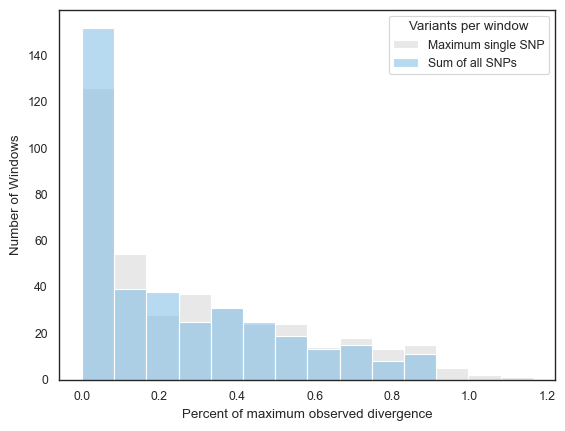

In [41]:
sns.histplot(data=df, x='value', hue='variable', palette = ['#71B7E4','lightgrey'])
plt.xlabel('Percent of maximum observed divergence')
plt.ylabel('Number of Windows')
plt.legend(title='Variants per window', loc='upper right', labels=['Maximum single SNP', 'Sum of all SNPs'])

plt.savefig("results/plots/ism_common_percent_explained.svg" , bbox_inches = 'tight')


Text(0.5, 0, 'Percent of maximum observed divergence')

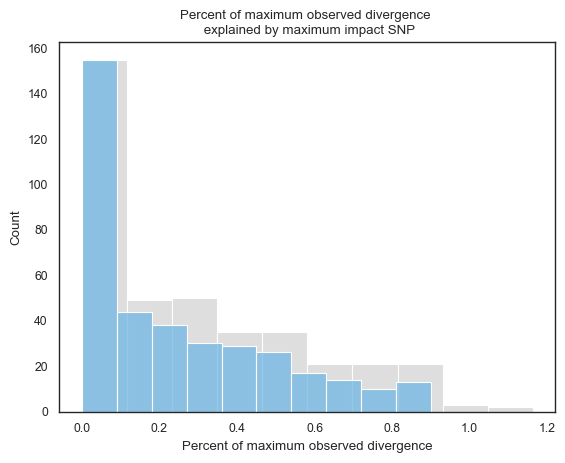

In [42]:
sns.histplot(emp['additive_percent_of_max'], color='lightgrey')
plt.title('Percent of maximum observed divergence \n explained by sum of all single SNP effects')
plt.xlabel('Percent of maximum observed divergence')
sns.histplot(emp['percent_of_max'], color = '#71B7E4')
plt.title('Percent of maximum observed divergence \n explained by maximum impact SNP')
plt.xlabel('Percent of maximum observed divergence')

In [43]:
emp

ttest_stat     ttest_pval  obs_mean  exp_mean   obs/exp  \
chr   windowStartPos                                                            
chr1  41418752        -26.987165  1.461871e-143  0.011143  0.003190  3.492743   
      57147392        -11.867927   9.060743e-32  0.021517  0.007885  2.728665   
      70778880         -5.334215   1.032114e-07  0.003761  0.002849  1.319976   
      88604672        -17.578602   7.272380e-66  0.014955  0.002522  5.929643   
      92798976        -16.384539   8.147811e-58  0.071182  0.008426  8.447434   
...                          ...            ...       ...       ...       ...   
chr21 35127296         -8.395653   7.093248e-17  0.030532  0.022997  1.327648   
chr22 22020096        -10.467888   3.332675e-25  0.023887  0.017606  1.356793   
      22544384         -9.387509   1.188089e-20  0.011776  0.007743  1.520958   
      47710208        -26.485256  7.297025e-139  0.055388  0.020211  2.740559   
      48234496        -55.442420   0.000000e+00  0.204145  0.035823  5.698711   

                       obs-exp   -log10(p) direction   sig  numWindowsAbove  \
chr   windowStartPos                                                          
chr1  41418752        0.007953  142.835091    higher  True                2   
      57147392        0.013631   31.042836    higher  True                1   
      70778880        0.000912    6.986272    higher  True                0   
      88604672        0.012433   65.138323    higher  True                7   
      92798976        0.062755   57.088959    higher  True                0   
...                        ...         ...       ...   ...              ...   
chr21 35127296        0.007535   16.149155    higher  True                0   
chr22 22020096        0.006282   24.477207    higher  True                0   
      22544384        0.004034   19.925151    higher  True                0   
      47710208        0.035178  138.136854    higher  True                0   
      48234496        0.168322         inf    higher  True              367   

                      ...       max   emp_min   emp_max  max_ism_div  \
chr   windowStartPos  ...                                              
chr1  41418752        ...  0.061708  0.000240  0.047160     0.013818   
      57147392        ...  0.241914  0.000711  0.198873     0.046179   
      70778880        ...  0.015220  0.000125  0.071377     0.004463   
      88604672        ...  0.068938  0.000080  0.055810     0.028706   
      92798976        ...  0.260017  0.000371  0.454930     0.000728   
...                   ...       ...       ...       ...          ...   
chr21 35127296        ...  0.120146  0.001044  0.323117     0.008852   
chr22 22020096        ...  0.055087  0.001038  0.190579     0.009399   
      22544384        ...  0.032310  0.000370  0.141347     0.006354   
      47710208        ...  0.142327  0.001173  0.203276     0.011125   
      48234496        ...  0.346398  0.002023  0.280502     0.033887   

                      max_obs_div  med_obs_div  percent_of_max  \
chr   windowStartPos                                             
chr1  41418752           0.061708     0.013622        0.223924   
      57147392           0.241914     0.002589        0.190889   
      70778880           0.015220     0.003781        0.293259   
      88604672           0.068938     0.000810        0.416400   
      92798976           0.260017     0.001733        0.002798   
...                           ...          ...             ...   
chr21 35127296           0.120146     0.029215        0.073674   
chr22 22020096           0.055087     0.024408        0.170624   
      22544384           0.032310     0.012853        0.196670   
      47710208           0.142327     0.045310        0.078165   
      48234496           0.346398     0.191353        0.097826   

                      percent_of_med   ism_sum  additive_percent_of_max  
chr   windowStartPos                                                  

## Annotate 3D disrupting variants

### ID disrupting variants

In [44]:
emp

ttest_stat     ttest_pval  obs_mean  exp_mean   obs/exp  \
chr   windowStartPos                                                            
chr1  41418752        -26.987165  1.461871e-143  0.011143  0.003190  3.492743   
      57147392        -11.867927   9.060743e-32  0.021517  0.007885  2.728665   
      70778880         -5.334215   1.032114e-07  0.003761  0.002849  1.319976   
      88604672        -17.578602   7.272380e-66  0.014955  0.002522  5.929643   
      92798976        -16.384539   8.147811e-58  0.071182  0.008426  8.447434   
...                          ...            ...       ...       ...       ...   
chr21 35127296         -8.395653   7.093248e-17  0.030532  0.022997  1.327648   
chr22 22020096        -10.467888   3.332675e-25  0.023887  0.017606  1.356793   
      22544384         -9.387509   1.188089e-20  0.011776  0.007743  1.520958   
      47710208        -26.485256  7.297025e-139  0.055388  0.020211  2.740559   
      48234496        -55.442420   0.000000e+00  0.204145  0.035823  5.698711   

                       obs-exp   -log10(p) direction   sig  numWindowsAbove  \
chr   windowStartPos                                                          
chr1  41418752        0.007953  142.835091    higher  True                2   
      57147392        0.013631   31.042836    higher  True                1   
      70778880        0.000912    6.986272    higher  True                0   
      88604672        0.012433   65.138323    higher  True                7   
      92798976        0.062755   57.088959    higher  True                0   
...                        ...         ...       ...   ...              ...   
chr21 35127296        0.007535   16.149155    higher  True                0   
chr22 22020096        0.006282   24.477207    higher  True                0   
      22544384        0.004034   19.925151    higher  True                0   
      47710208        0.035178  138.136854    higher  True                0   
      48234496        0.168322         inf    higher  True              367   

                      ...       max   emp_min   emp_max  max_ism_div  \
chr   windowStartPos  ...                                              
chr1  41418752        ...  0.061708  0.000240  0.047160     0.013818   
      57147392        ...  0.241914  0.000711  0.198873     0.046179   
      70778880        ...  0.015220  0.000125  0.071377     0.004463   
      88604672        ...  0.068938  0.000080  0.055810     0.028706   
      92798976        ...  0.260017  0.000371  0.454930     0.000728   
...                   ...       ...       ...       ...          ...   
chr21 35127296        ...  0.120146  0.001044  0.323117     0.008852   
chr22 22020096        ...  0.055087  0.001038  0.190579     0.009399   
      22544384        ...  0.032310  0.000370  0.141347     0.006354   
      47710208        ...  0.142327  0.001173  0.203276     0.011125   
      48234496        ...  0.346398  0.002023  0.280502     0.033887   

                      max_obs_div  med_obs_div  percent_of_max  \
chr   windowStartPos                                             
chr1  41418752           0.061708     0.013622        0.223924   
      57147392           0.241914     0.002589        0.190889   
      70778880           0.015220     0.003781        0.293259   
      88604672           0.068938     0.000810        0.416400   
      92798976           0.260017     0.001733        0.002798   
...                           ...          ...             ...   
chr21 35127296           0.120146     0.029215        0.073674   
chr22 22020096           0.055087     0.024408        0.170624   
      22544384           0.032310     0.012853        0.196670   
      47710208           0.142327     0.045310        0.078165   
      48234496           0.346398     0.191353        0.097826   

                      percent_of_med   ism_sum  additive_percent_of_max  
chr   windowStartPos                                                  

In [45]:
ism_dict[('chr1',
  41418752)]

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman,percent_of_max_observed
0,chr1,41419194,41418752,G,A,4.010169e-10,1.528952e-09,2.227691e-09,3.610057e-08
1,chr1,41419903,41418752,T,A,6.424570e-10,2.430540e-09,4.395940e-09,7.123786e-08
2,chr1,41419982,41418752,G,A,2.975184e-10,9.618393e-10,2.712017e-09,4.394926e-08
3,chr1,41420026,41418752,T,C,1.394818e-10,4.707098e-10,1.339220e-09,2.170256e-08
4,chr1,41421729,41418752,G,A,1.894821e-10,7.112624e-10,1.574174e-09,2.551008e-08
...,...,...,...,...,...,...,...,...,...
1741,chr1,42465654,41418752,G,T,2.755102e-10,1.058228e-09,1.286805e-09,2.085315e-08
1742,chr1,42465656,41418752,C,T,1.067920e-10,4.187068e-10,7.180145e-10,1.163570e-08
1743,chr1,42465863,41418752,A,G,2.016804e-10,6.311963e-10,9.683133e-10,1.569188e-08
1744,chr1,42466665,41418752,C,T,8.591350e-10,3.369644e-09,4.139793e-09,6.708690e-08


In [46]:
w = ('chr1',
  41418752)

In [47]:
emp

ttest_stat     ttest_pval  obs_mean  exp_mean   obs/exp  \
chr   windowStartPos                                                            
chr1  41418752        -26.987165  1.461871e-143  0.011143  0.003190  3.492743   
      57147392        -11.867927   9.060743e-32  0.021517  0.007885  2.728665   
      70778880         -5.334215   1.032114e-07  0.003761  0.002849  1.319976   
      88604672        -17.578602   7.272380e-66  0.014955  0.002522  5.929643   
      92798976        -16.384539   8.147811e-58  0.071182  0.008426  8.447434   
...                          ...            ...       ...       ...       ...   
chr21 35127296         -8.395653   7.093248e-17  0.030532  0.022997  1.327648   
chr22 22020096        -10.467888   3.332675e-25  0.023887  0.017606  1.356793   
      22544384         -9.387509   1.188089e-20  0.011776  0.007743  1.520958   
      47710208        -26.485256  7.297025e-139  0.055388  0.020211  2.740559   
      48234496        -55.442420   0.000000e+00  0.204145  0.035823  5.698711   

                       obs-exp   -log10(p) direction   sig  numWindowsAbove  \
chr   windowStartPos                                                          
chr1  41418752        0.007953  142.835091    higher  True                2   
      57147392        0.013631   31.042836    higher  True                1   
      70778880        0.000912    6.986272    higher  True                0   
      88604672        0.012433   65.138323    higher  True                7   
      92798976        0.062755   57.088959    higher  True                0   
...                        ...         ...       ...   ...              ...   
chr21 35127296        0.007535   16.149155    higher  True                0   
chr22 22020096        0.006282   24.477207    higher  True                0   
      22544384        0.004034   19.925151    higher  True                0   
      47710208        0.035178  138.136854    higher  True                0   
      48234496        0.168322         inf    higher  True              367   

                      ...       max   emp_min   emp_max  max_ism_div  \
chr   windowStartPos  ...                                              
chr1  41418752        ...  0.061708  0.000240  0.047160     0.013818   
      57147392        ...  0.241914  0.000711  0.198873     0.046179   
      70778880        ...  0.015220  0.000125  0.071377     0.004463   
      88604672        ...  0.068938  0.000080  0.055810     0.028706   
      92798976        ...  0.260017  0.000371  0.454930     0.000728   
...                   ...       ...       ...       ...          ...   
chr21 35127296        ...  0.120146  0.001044  0.323117     0.008852   
chr22 22020096        ...  0.055087  0.001038  0.190579     0.009399   
      22544384        ...  0.032310  0.000370  0.141347     0.006354   
      47710208        ...  0.142327  0.001173  0.203276     0.011125   
      48234496        ...  0.346398  0.002023  0.280502     0.033887   

                      max_obs_div  med_obs_div  percent_of_max  \
chr   windowStartPos                                             
chr1  41418752           0.061708     0.013622        0.223924   
      57147392           0.241914     0.002589        0.190889   
      70778880           0.015220     0.003781        0.293259   
      88604672           0.068938     0.000810        0.416400   
      92798976           0.260017     0.001733        0.002798   
...                           ...          ...             ...   
chr21 35127296           0.120146     0.029215        0.073674   
chr22 22020096           0.055087     0.024408        0.170624   
      22544384           0.032310     0.012853        0.196670   
      47710208           0.142327     0.045310        0.078165   
      48234496           0.346398     0.191353        0.097826   

                      percent_of_med   ism_sum  additive_percent_of_max  
chr   windowStartPos                                                  

In [48]:
ism

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman
0,chr1,41419194,41418752,G,A,4.010169e-10,1.528952e-09,2.227691e-09
1,chr1,41419903,41418752,T,A,6.424570e-10,2.430540e-09,4.395940e-09
2,chr1,41419982,41418752,G,A,2.975184e-10,9.618393e-10,2.712017e-09
3,chr1,41420026,41418752,T,C,1.394818e-10,4.707098e-10,1.339220e-09
4,chr1,41421729,41418752,G,A,1.894821e-10,7.112624e-10,1.574174e-09
...,...,...,...,...,...,...,...,...
721717,chr9,125819519,124780544,C,G,6.015042e-09,1.393339e-08,1.644450e-08
721718,chr9,125821620,124780544,G,A,2.798776e-09,6.660611e-09,1.031697e-08
721719,chr9,125824208,124780544,A,T,2.335459e-10,5.788691e-10,1.391949e-09
721720,chr9,125824786,124780544,C,T,2.315557e-09,5.479565e-09,6.564956e-09


In [49]:
# ism variant is more disruptive than median observed individual divergence
mod_vars = pd.DataFrame(columns = ism.columns)
for w in ism_dict.keys():
    df = ism_dict[w]
    em = emp.loc[w].med_obs_div
    df = df[df['1-spearman'] > em]
    if df.shape[0] != 0:
        mod_vars = pd.concat([mod_vars, df])
mod_vars

/var/folders/h7/skbyg_hd0lb0s5rwqt8vxx4r0000gn/T/ipykernel_28182/46215521.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mod_vars = pd.concat([mod_vars, df])


,chr,pos,window,ref,alt,mse,1-pearson,1-spearman,percent_of_max_observed
934,chr1,41924264,41418752,G,A,0.002050,0.007383,0.013818,0.223924
3169,chr1,57835819,57147392,G,C,0.001049,0.032333,0.046179,0.190889
4891,chr1,71588165,70778880,G,C,0.000709,0.001443,0.004463,0.293259
6013,chr1,89085986,88604672,G,C,0.012915,0.018012,0.028706,0.416400
41997,chr1,207692807,207093760,T,G,0.001659,0.011808,0.014019,0.346031
...,...,...,...,...,...,...,...,...,...
407524,chr20,53099036,52428800,C,T,0.001304,0.060778,0.056723,0.714326
413921,chr21,19735128,19398656,T,A,0.001202,0.052344,0.081342,0.527366
418169,chr21,21751496,20971520,A,G,0.002042,0.028540,0.058876,0.253647
418170,chr21,21751496,21495808,A,G,0.001653,0.062862,0.072187,0.148892


In [50]:
mod_vars = pd.DataFrame(columns = ism.columns)
for w in ism_dict.keys():
    df = ism_dict[w]
    df = df[df['percent_of_max_observed'] > .5]
    if df.shape[0] != 0:
        mod_vars = pd.concat([mod_vars, df])
mod_vars

/var/folders/h7/skbyg_hd0lb0s5rwqt8vxx4r0000gn/T/ipykernel_28182/2825464385.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mod_vars = pd.concat([mod_vars, df])


,chr,pos,window,ref,alt,mse,1-pearson,1-spearman,percent_of_max_observed
309441,chr2,18178938,17825792,C,T,0.005557,0.014375,0.016556,0.677029
312189,chr2,28155815,27262976,C,T,0.009965,0.017268,0.026854,0.830247
312190,chr2,28155815,27787264,C,T,0.019031,0.053049,0.096345,0.848726
319313,chr2,35858407,35127296,A,G,0.010148,0.169487,0.154261,0.862917
319314,chr2,35858407,35651584,A,G,0.007491,0.054273,0.058001,0.557110
...,...,...,...,...,...,...,...,...,...
395166,chr20,12661100,12058624,A,T,0.001295,0.008427,0.027543,0.529449
400472,chr20,38790643,38273024,C,T,0.019338,0.046760,0.053516,0.530156
402077,chr20,41572207,40894464,G,C,0.008765,0.026429,0.029039,0.684638
407524,chr20,53099036,52428800,C,T,0.001304,0.060778,0.056723,0.714326


In [51]:
mod_vars = pd.DataFrame(columns = ism.columns)
for w in ism_dict.keys():
    df = ism_dict[w]
    df = df[df['percent_of_max_observed'] > .2]
    if df.shape[0] != 0:
        mod_vars = pd.concat([mod_vars, df])
mod_vars

/var/folders/h7/skbyg_hd0lb0s5rwqt8vxx4r0000gn/T/ipykernel_28182/2482325231.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mod_vars = pd.concat([mod_vars, df])


,chr,pos,window,ref,alt,mse,1-pearson,1-spearman,percent_of_max_observed
934,chr1,41924264,41418752,G,A,0.002050,0.007383,0.013818,0.223924
4891,chr1,71588165,70778880,G,C,0.000709,0.001443,0.004463,0.293259
6013,chr1,89085986,88604672,G,C,0.012915,0.018012,0.028706,0.416400
10056,chr1,97870773,96993280,G,A,0.000861,0.013771,0.016971,0.391997
10057,chr1,97870773,97517568,G,A,0.001004,0.008537,0.010392,0.333523
...,...,...,...,...,...,...,...,...,...
402077,chr20,41572207,40894464,G,C,0.008765,0.026429,0.029039,0.684638
407524,chr20,53099036,52428800,C,T,0.001304,0.060778,0.056723,0.714326
413921,chr21,19735128,19398656,T,A,0.001202,0.052344,0.081342,0.527366
418169,chr21,21751496,20971520,A,G,0.002042,0.028540,0.058876,0.253647


In [51]:
mod_vars['pos+1'] = mod_vars['pos'] +1
mod_vars = mod_vars[['chr','pos', 'pos+1','window','ref','alt','percent_of_max_observed']]

In [52]:
mod_vars[mod_vars.chr == 'chr7']

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman,percent_of_max_observed
654650,chr7,52451562,51904512,A,G,0.001409,0.069639,0.111052,0.224126
668055,chr7,98168805,97517568,G,A,0.016239,0.037327,0.036992,0.859577
668056,chr7,98168805,98041856,G,A,0.010360,0.009371,0.012115,0.727193
673005,chr7,126645389,125829120,C,T,0.004075,0.222784,0.222205,0.386297
673006,chr7,126645389,126353408,C,T,0.003400,0.036943,0.065999,0.419244


### genomic annotations

In [92]:
ctcf = pybedtools.BedTool('%s/annotations/ctcf_full_merged_hg38.bed' % DATA_PATH)
genes = pybedtools.BedTool('%s/annotations/grch38_gene_annotations.bed' % DATA_PATH)

In [134]:
mod_vars_annot = BedTool.from_dataframe(mod_vars).intersect(ctcf, wao=True).to_dataframe(disable_auto_names=True, header=None)
mod_vars_annot.columns = list(mod_vars.columns) + ['elem_chr','elem_start','elem_stop','ctcf']
mod_vars_annot = mod_vars_annot[list(mod_vars.columns) + ['ctcf']]

mod_vars_annot = BedTool.from_dataframe(mod_vars_annot).intersect(genes, wao=True).to_dataframe(disable_auto_names=True, header=None)
mod_vars_annot.columns = list(mod_vars.columns) + ['ctcf'] + ['elem_chr','elem_start','elem_stop','gene_name','genes']
mod_vars_annot = mod_vars_annot[list(mod_vars.columns) + ['ctcf', 'gene_name','genes']]
mod_vars_annot = mod_vars_annot.drop_duplicates(subset = list(mod_vars.columns), ignore_index=True)

phylop=pd.read_table('%s/phylop.txt' % DATA_PATH)
mod_vars_annot['phylop'] = phylop['Mean']


Text(0.5, 1.0, 'PhyloP Score distribution for 3D modifying SNPs')

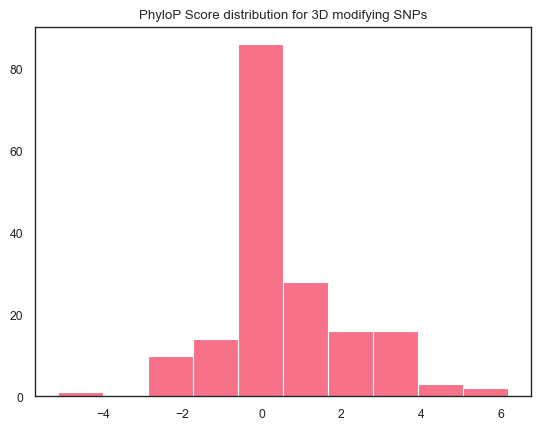

In [54]:
plt.hist(mod_vars_annot['phylop'])
plt.title('PhyloP Score distribution for 3D modifying SNPs')

In [55]:
mod_vars_annot[mod_vars_annot.ctcf==1].shape

(145, 11)

In [56]:
mod_vars_annot[mod_vars_annot.ctcf==0].shape

(31, 11)

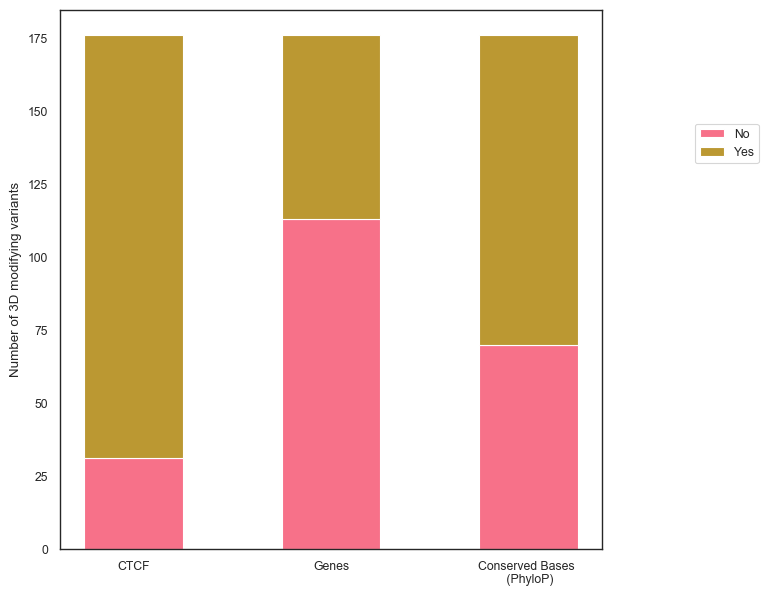

In [57]:
annots = ['CTCF','Genes', 'Conserved Bases \n (PhyloP)']
#1 = conserved phylop> 0 , 0 = fast evolving, phylop<0
annot_counts = {'No':[31, 113,70 ], 'Yes': [145,63, 106]}

width = 0.5

fig, ax = plt.subplots(figsize=(7,7))
bottom = np.zeros(3)

for boolean, annot_counts in annot_counts.items():
    p = ax.bar(annots, annot_counts, width, label=boolean, bottom=bottom)
    bottom += annot_counts

plt.ylabel('Number of 3D modifying variants')
ax.legend(loc="best", bbox_to_anchor=(.8, 0., 0.5, 0.8))


plt.savefig("%s/ism_common_annotations.svg" % FIG_PATH, bbox_inches = 'tight')

plt.show()

In [40]:
63/176

0.35795454545454547

### gorkin qtls

In [123]:
gorkin = pybedtools.BedTool('%s/Gorkin_3DQTLs/gorkin_qtls_hg38.bed' % DATA_PATH)


In [124]:
mod_vars_annot

,chr,pos,pos+1,window,ref,alt,percent_of_max_observed,pos-1,ctcf,gene_name,genes,phylop
0,chr1,41924264,41924265,41418752,G,A,0.223924,41924263,0,.,0,0.387512
1,chr1,71588165,71588166,70778880,G,C,0.293259,71588164,1,NEGR1,1,2.035560
2,chr1,89085986,89085987,88604672,G,C,0.416400,89085985,1,.,0,0.225583
3,chr1,97870773,97870774,96993280,G,A,0.391997,97870772,1,DPYD,1,6.199230
4,chr1,97870773,97870774,97517568,G,A,0.333523,97870772,1,DPYD,1,6.199230
...,...,...,...,...,...,...,...,...,...,...,...,...
171,chr20,41572207,41572208,40894464,G,C,0.684638,41572206,1,CHD6,1,1.619590
172,chr20,53099036,53099037,52428800,C,T,0.714326,53099035,0,TSHZ2,1,-0.038354
173,chr21,19735128,19735129,19398656,T,A,0.527366,19735127,0,.,0,0.415480
174,chr21,21751496,21751497,20971520,A,G,0.253647,21751495,1,.,0,-0.011937


In [142]:
gorkin.to_dataframe(disable_auto_names=True, header=None)

,0,1,2,3
0,chr1,8799449,8799450,INS
1,chr1,11021211,11021212,INS
2,chr1,11872620,11872621,INS
3,chr1,14018068,14018069,INS
4,chr1,15076223,15076224,INS
...,...,...,...,...
2301,chr9,130904423,130904424,C
2302,chr9,72323586,72323587,C
2303,chr9,80447983,80447984,C
2304,chr9,108188641,108188642,C


In [126]:
mod_vars_annot

,chr,pos,pos+1,window,ref,alt,percent_of_max_observed,pos-1,ctcf,gene_name,genes,phylop
0,chr1,41924264,41924265,41418752,G,A,0.223924,41924263,0,.,0,0.387512
1,chr1,71588165,71588166,70778880,G,C,0.293259,71588164,1,NEGR1,1,2.035560
2,chr1,89085986,89085987,88604672,G,C,0.416400,89085985,1,.,0,0.225583
3,chr1,97870773,97870774,96993280,G,A,0.391997,97870772,1,DPYD,1,6.199230
4,chr1,97870773,97870774,97517568,G,A,0.333523,97870772,1,DPYD,1,6.199230
...,...,...,...,...,...,...,...,...,...,...,...,...
171,chr20,41572207,41572208,40894464,G,C,0.684638,41572206,1,CHD6,1,1.619590
172,chr20,53099036,53099037,52428800,C,T,0.714326,53099035,0,TSHZ2,1,-0.038354
173,chr21,19735128,19735129,19398656,T,A,0.527366,19735127,0,.,0,0.415480
174,chr21,21751496,21751497,20971520,A,G,0.253647,21751495,1,.,0,-0.011937


In [130]:
BedTool.from_dataframe(mod_vars_annot).intersect(gorkin, wao=True).to_dataframe(disable_auto_names=True, header=None)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,chr1,41924264,41924265,41418752,G,A,0.223924,41924263,0,.,0,0.387512,.,-1,-1,.,0
1,chr1,71588165,71588166,70778880,G,C,0.293259,71588164,1,NEGR1,1,2.035560,.,-1,-1,.,0
2,chr1,89085986,89085987,88604672,G,C,0.416400,89085985,1,.,0,0.225583,.,-1,-1,.,0
3,chr1,97870773,97870774,96993280,G,A,0.391997,97870772,1,DPYD,1,6.199230,.,-1,-1,.,0
4,chr1,97870773,97870774,97517568,G,A,0.333523,97870772,1,DPYD,1,6.199230,.,-1,-1,.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,chr20,41572207,41572208,40894464,G,C,0.684638,41572206,1,CHD6,1,1.619590,.,-1,-1,.,0
172,chr20,53099036,53099037,52428800,C,T,0.714326,53099035,0,TSHZ2,1,-0.038354,.,-1,-1,.,0
173,chr21,19735128,19735129,19398656,T,A,0.527366,19735127,0,.,0,0.415480,.,-1,-1,.,0
174,chr21,21751496,21751497,20971520,A,G,0.253647,21751495,1,.,0,-0.011937,.,-1,-1,.,0


In [140]:
mod_vars_annot = BedTool.from_dataframe(mod_vars_annot).intersect(gorkin, wao=True, f=-5).to_dataframe(disable_auto_names=True, header=None)
mod_vars_annot.columns = list(mod_vars.columns) + ['ctcf', 'gene_name','genes', 'phylop'] + ['elem_chr','elem_start','elem_stop', 'phenotype','3D_QTL']
mod_vars_annot = mod_vars_annot[list(mod_vars.columns) + ['ctcf', 'gene_name','genes', 'phylop', 'phenotype', '3D_QTL']]
#mod_vars_annot = mod_vars_annot.drop_duplicates(subset = list(mod_vars.columns), ignore_index=True)


BEDToolsError: 
Command was:

	bedtools intersect -a /var/folders/h7/skbyg_hd0lb0s5rwqt8vxx4r0000gn/T/pybedtools.m5sq4nre.tmp -wao -f -5 -b /Users/egilbertson/Library/CloudStorage/Box-Box/UCSF/CapraLab/3DGenome/bin/3Dbin/activeNotebooks/../../../downloads/Gorkin_3DQTLs/gorkin_qtls_hg38.bed

Error message was:

Tool:    bedtools intersect (aka intersectBed)
Version: v2.31.1
Summary: Report overlaps between two feature files.

Usage:   bedtools intersect [OPTIONS] -a <bed/gff/vcf/bam> -b <bed/gff/vcf/bam>

	Note: -b may be followed with multiple databases and/or 
	wildcard (*) character(s). 
Options: 
	-wa	Write the original entry in A for each overlap.

	-wb	Write the original entry in B for each overlap.
		- Useful for knowing _what_ A overlaps. Restricted by -f and -r.

	-loj	Perform a "left outer join". That is, for each feature in A
		report each overlap with B.  If no overlaps are found, 
		report a NULL feature for B.

	-wo	Write the original A and B entries plus the number of base
		pairs of overlap between the two features.
		- Overlaps restricted by -f and -r.
		  Only A features with overlap are reported.

	-wao	Write the original A and B entries plus the number of base
		pairs of overlap between the two features.
		- Overlapping features restricted by -f and -r.
		  However, A features w/o overlap are also reported
		  with a NULL B feature and overlap = 0.

	-u	Write the original A entry _once_ if _any_ overlaps found in B.
		- In other words, just report the fact >=1 hit was found.
		- Overlaps restricted by -f and -r.

	-c	For each entry in A, report the number of overlaps with B.
		- Reports 0 for A entries that have no overlap with B.
		- Overlaps restricted by -f, -F, -r, and -s.

	-C	For each entry in A, separately report the number of
		- overlaps with each B file on a distinct line.
		- Reports 0 for A entries that have no overlap with B.
		- Overlaps restricted by -f, -F, -r, and -s.

	-v	Only report those entries in A that have _no overlaps_ with B.
		- Similar to "grep -v" (an homage).

	-ubam	Write uncompressed BAM output. Default writes compressed BAM.

	-s	Require same strandedness.  That is, only report hits in B
		that overlap A on the _same_ strand.
		- By default, overlaps are reported without respect to strand.

	-S	Require different strandedness.  That is, only report hits in B
		that overlap A on the _opposite_ strand.
		- By default, overlaps are reported without respect to strand.

	-f	Minimum overlap required as a fraction of A.
		- Default is 1E-9 (i.e., 1bp).
		- FLOAT (e.g. 0.50)

	-F	Minimum overlap required as a fraction of B.
		- Default is 1E-9 (i.e., 1bp).
		- FLOAT (e.g. 0.50)

	-r	Require that the fraction overlap be reciprocal for A AND B.
		- In other words, if -f is 0.90 and -r is used, this requires
		  that B overlap 90% of A and A _also_ overlaps 90% of B.

	-e	Require that the minimum fraction be satisfied for A OR B.
		- In other words, if -e is used with -f 0.90 and -F 0.10 this requires
		  that either 90% of A is covered OR 10% of  B is covered.
		  Without -e, both fractions would have to be satisfied.

	-split	Treat "split" BAM or BED12 entries as distinct BED intervals.

	-g	Provide a genome file to enforce consistent chromosome sort order
		across input files. Only applies when used with -sorted option.

	-nonamecheck	For sorted data, don't throw an error if the file has different naming conventions
			for the same chromosome. ex. "chr1" vs "chr01".

	-sorted	Use the "chromsweep" algorithm for sorted (-k1,1 -k2,2n) input.

	-names	When using multiple databases, provide an alias for each that
		will appear instead of a fileId when also printing the DB record.

	-filenames	When using multiple databases, show each complete filename
			instead of a fileId when also printing the DB record.

	-sortout	When using multiple databases, sort the output DB hits
			for each record.

	-bed	If using BAM input, write output as BED.

	-header	Print the header from the A file prior to results.

	-nobuf	Disable buffered output. Using this option will cause each line
		of output to be printed as it is generated, rather than saved
		in a buffer. This will make printing large output files 
		noticeably slower, but can be useful in conjunction with
		other software tools and scripts that need to process one
		line of bedtools output at a time.

	-iobuf	Specify amount of memory to use for input buffer.
		Takes an integer argument. Optional suffixes K/M/G supported.
		Note: currently has no effect with compressed files.

Notes: 
	(1) When a BAM file is used for the A file, the alignment is retained if overlaps exist,
	and excluded if an overlap cannot be found.  If multiple overlaps exist, they are not
	reported, as we are only testing for one or more overlaps.




***** ERROR: -f must be in the range (0.0, 1.0]. *****


In [139]:
mod_vars_annot[mod_vars_annot['3D_QTL'] != 0]

,chr,pos,pos+1,window,ref,alt,percent_of_max_observed,pos-1,ctcf,gene_name,genes,phylop,phenotype,3D_QTL


In [91]:
mod_vars.columns

Index(['chr', 'pos', 'pos+1', 'window', 'ref', 'alt',
       'percent_of_max_observed'],
      dtype='object')

# IDWs

## choose variants for IDW mutagenesis

In [53]:
comp_list = pd.read_csv('%s/comp_tables/pairwise_subsample_genomewide_averages.csv' % RESULTS_PATH,
                       index_col=0)
all_indivs = sorted(list(set(comp_list.ind1.unique()) | set(comp_list.ind2.unique())))

In [54]:
comp_list

,ind1,ind2,super1,sub1,sex1,ind1.1,super2,sub2,sex2,ind2.1,...,avg_spearman,avg_divergence,super1.1,sub1.1,sex1.1,ind1.2,super2.1,sub2.1,sex2.1,ind2.2
0,AFR_ASW_female_NA19917,AFR_ASW_female_NA19901,AFR,ASW,female,NA19917,AFR,ASW,female,NA19901,...,0.996195,0.003805,AFR,ASW,female,NA19917,AFR,ASW,female,NA19901
1,AFR_ASW_female_NA19917,AFR_ASW_female_NA20314,AFR,ASW,female,NA19917,AFR,ASW,female,NA20314,...,0.996164,0.003836,AFR,ASW,female,NA19917,AFR,ASW,female,NA20314
2,AFR_ASW_female_NA19917,AFR_ASW_female_NA20317,AFR,ASW,female,NA19917,AFR,ASW,female,NA20317,...,0.995868,0.004132,AFR,ASW,female,NA19917,AFR,ASW,female,NA20317
3,AFR_ASW_female_NA19917,AFR_ASW_female_NA19625,AFR,ASW,female,NA19917,AFR,ASW,female,NA19625,...,0.995808,0.004192,AFR,ASW,female,NA19917,AFR,ASW,female,NA19625
4,AFR_ASW_female_NA19917,AFR_ACB_female_HG02337,AFR,ASW,female,NA19917,AFR,ACB,female,HG02337,...,0.995922,0.004078,AFR,ASW,female,NA19917,AFR,ACB,female,HG02337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8380,EUR_CEU_female_NA12044,EUR_CEU_female_NA06985,EUR,CEU,female,NA12044,EUR,CEU,female,NA06985,...,0.997105,0.002895,EUR,CEU,female,NA12044,EUR,CEU,female,NA06985
8381,EUR_CEU_female_NA12044,EUR_CEU_female_NA12046,EUR,CEU,female,NA12044,EUR,CEU,female,NA12046,...,0.997350,0.002650,EUR,CEU,female,NA12044,EUR,CEU,female,NA12046
8382,EUR_CEU_female_NA07000,EUR_CEU_female_NA06985,EUR,CEU,female,NA07000,EUR,CEU,female,NA06985,...,0.997287,0.002713,EUR,CEU,female,NA07000,EUR,CEU,female,NA06985
8383,EUR_CEU_female_NA07000,EUR_CEU_female_NA12046,EUR,CEU,female,NA07000,EUR,CEU,female,NA12046,...,0.997193,0.002807,EUR,CEU,female,NA07000,EUR,CEU,female,NA12046


In [55]:
indivs = comp_list[['ind1','super1','sub1','sex1','ind1.1']]
indivs = indivs.drop_duplicates()
extra_ind = comp_list[comp_list.ind2 == 'EUR_CEU_female_NA12046'][['ind2','super2','sub2','sex2','ind2.2']].drop_duplicates()
extra_ind.columns = indivs.columns
indivs = pd.concat([indivs, extra_ind], axis=0, ignore_index=True)

In [25]:
indivs = pd.DataFrame(columns = ['name','super','sub','sex','id'])
for i in all_indivs:
    if i in list(comp_list['ind1']):
        new = comp_list[comp_list.ind1 == i][['ind1','super1','sub1','sex1','ind1.1']].drop_duplicates()
    elif i in list(comp_list['ind2']):
        new = comp_list[comp_list.ind2 == i][['ind2','super2','sub2','sex2','ind2.2']].drop_duplicates()
    new.columns = indivs.columns
    indivs = pd.concat([indivs, new], axis=0, ignore_index=True)


In [26]:
len(c)

130

In [27]:
indivs


,name,super,sub,sex,id
0,AFR_ACB_female_HG01896,AFR,ACB,female,HG01896
1,AFR_ACB_female_HG02095,AFR,ACB,female,HG02095
2,AFR_ACB_female_HG02337,AFR,ACB,female,HG02337
3,AFR_ACB_female_HG02505,AFR,ACB,female,HG02505
4,AFR_ACB_female_HG02555,AFR,ACB,female,HG02555
...,...,...,...,...,...
125,SAS_STU_female_HG03673,SAS,STU,female,HG03673
126,SAS_STU_female_HG03836,SAS,STU,female,HG03836
127,SAS_STU_female_HG03886,SAS,STU,female,HG03886
128,SAS_STU_female_HG03944,SAS,STU,female,HG03944


In [28]:
vcf_header = pd.read_table('%s/vcfs/vcf_header.txt' % DATA_PATH, header=None, usecols=[i for i in range(9,2557)])
vcf_header = vcf_header.T.reset_index()

In [33]:
vcf_header[vcf_header[0] =='NA12046']

,index,0
1727,1736,NA12046


In [35]:
indivs

,name,super,sub,sex,id,index,0
90,EUR_GBR_female_HG00130,EUR,GBR,female,HG00130,41,HG00130
91,EUR_GBR_female_HG00237,EUR,GBR,female,HG00237,92,HG00237
92,EUR_GBR_female_HG00238,EUR,GBR,female,HG00238,93,HG00238
93,EUR_GBR_female_HG00239,EUR,GBR,female,HG00239,94,HG00239
94,EUR_GBR_female_HG00255,EUR,GBR,female,HG00255,107,HG00255
...,...,...,...,...,...,...,...
110,SAS_GIH_female_NA20849,SAS,GIH,female,NA20849,2454,NA20849
111,SAS_GIH_female_NA20869,SAS,GIH,female,NA20869,2470,NA20869
112,SAS_GIH_female_NA20882,SAS,GIH,female,NA20882,2480,NA20882
113,SAS_GIH_female_NA20894,SAS,GIH,female,NA20894,2491,NA20894


In [34]:
indivs = indivs.merge(vcf_header, left_on='id', right_on=0).sort_values(by='index')

KeyError: 'index'

In [36]:
indivs.to_csv('%s/vcfs/vcf_indexing.txt' % DATA_PATH)

In [37]:
a = list(indivs['index']+1)

In [38]:
a.sort()

In [39]:
a

[42,
 93,
 94,
 95,
 108,
 157,
 161,
 162,
 164,
 196,
 242,
 257,
 261,
 267,
 271,
 288,
 332,
 390,
 408,
 418,
 420,
 453,
 471,
 479,
 509,
 523,
 539,
 600,
 609,
 614,
 615,
 645,
 647,
 652,
 689,
 694,
 707,
 734,
 794,
 798,
 811,
 822,
 838,
 863,
 880,
 894,
 903,
 921,
 997,
 1011,
 1047,
 1053,
 1057,
 1067,
 1088,
 1091,
 1126,
 1143,
 1149,
 1160,
 1168,
 1216,
 1228,
 1248,
 1312,
 1340,
 1358,
 1379,
 1382,
 1384,
 1387,
 1393,
 1396,
 1417,
 1476,
 1484,
 1486,
 1514,
 1544,
 1577,
 1580,
 1662,
 1668,
 1677,
 1679,
 1697,
 1701,
 1735,
 1737,
 1778,
 1818,
 1827,
 1860,
 1864,
 1894,
 1960,
 1989,
 1999,
 2005,
 2023,
 2032,
 2064,
 2083,
 2088,
 2091,
 2104,
 2115,
 2137,
 2196,
 2204,
 2216,
 2226,
 2246,
 2264,
 2267,
 2278,
 2294,
 2301,
 2322,
 2323,
 2344,
 2366,
 2370,
 2406,
 2412,
 2455,
 2471,
 2481,
 2492,
 2494]

In [40]:
indivs

,name,super,sub,sex,id,index,0
90,EUR_GBR_female_HG00130,EUR,GBR,female,HG00130,41,HG00130
91,EUR_GBR_female_HG00237,EUR,GBR,female,HG00237,92,HG00237
92,EUR_GBR_female_HG00238,EUR,GBR,female,HG00238,93,HG00238
93,EUR_GBR_female_HG00239,EUR,GBR,female,HG00239,94,HG00239
94,EUR_GBR_female_HG00255,EUR,GBR,female,HG00255,107,HG00255
...,...,...,...,...,...,...,...
110,SAS_GIH_female_NA20849,SAS,GIH,female,NA20849,2454,NA20849
111,SAS_GIH_female_NA20869,SAS,GIH,female,NA20869,2470,NA20869
112,SAS_GIH_female_NA20882,SAS,GIH,female,NA20882,2480,NA20882
113,SAS_GIH_female_NA20894,SAS,GIH,female,NA20894,2491,NA20894


In [15]:
idw_vars_non_ref = pd.read_table("%s/IDWs/IDW_variants_non-ref.txt" % DATA_PATH, header=None, names = ['chr', 'pos', 'ref', 'alt', 'window_start'])
idw_vars_non_ref['window_start'] = idw_vars_non_ref['window_start'] + 1
idw_vars_ref = pd.read_table("%s/IDWs/IDW_variants_ref.txt" % DATA_PATH, header=None, names = ['chr', 'pos', 'ref', 'alt', 'window_start'])
idw_vars_ref['window_start'] = idw_vars_ref['window_start'] + 1

In [16]:
idw_vars_non_ref['chr'] = 'chr' + idw_vars_non_ref['chr'].astype(str)

In [17]:
idw_vars_ref['chr'] = 'chr' + idw_vars_ref['chr'].astype(str)

In [18]:
idw_vars_non_ref[idw_vars_non_ref.chr=='chr1'].sort_values(by='pos')

,chr,pos,ref,alt,window_start
3068,chr1,23663528,C,T,23592960
3069,chr1,23760986,T,C,23592960
3070,chr1,23904944,G,A,23592960
3071,chr1,23905564,C,T,23592960
3072,chr1,23923378,A,G,23592960
...,...,...,...,...,...
93067,chr1,160822048,G,A,159907840
93068,chr1,160872709,G,C,159907840
93069,chr1,160908490,A,G,159907840
93070,chr1,160935878,G,A,159907840


In [19]:
idw_vars_non_ref.to_csv('%s/in_silico_mutagenesis/variants_in_divergent_windows_idw_non_ref.txt' % DATA_PATH, sep='\t', header=False, index=False)

In [20]:
idw_vars_ref.to_csv('%s/in_silico_mutagenesis/variants_in_divergent_windows_idw_ref.txt' % DATA_PATH, sep='\t', header=False, index=False)

In [38]:
idw_vars_non_ref.chr.unique()


array(['chr6', 'chr7', 'chr10', 'chr4', 'chr9', 'chr3', 'chr1', 'chr2',
       'chr5', 'chr8', 'chr11', 'chr15', 'chr12', 'chr19', 'chr13',
       'chr22'], dtype=object)





## load in mutagenesis files and set up dictionary data structure

run in command line for bash script
```
head -n 1 ism_scores_idw_rare_alternate_1.txt > ism_scores_idw_rare_alternate.txt
for i in {1..1246}; do tail -n +2 ism_scores_idw_rare_alternate_$i.txt >> div.tmp; done
sort -k1,1 -k2n,2 div.tmp >> ism_scores_idw_rare_alternate.txt
rm div.tmp
```

## Rare alternate allele

In [56]:
ism = pd.read_table('%s/in_silico_mutagenesis/IDW/ism_scores_idw_rare_alternate.txt' % DATA_PATH)
# ancestral 3D dataframes
anc_spear = pd.read_table('%s/comp_tables/anc_window_spearman.csv' % RESULTS_PATH
                    , sep=',', header=[0,1,2,3], index_col=[0,1])
anc_div = 1-anc_spear


In [57]:
ism

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman
0,chr1,3732688,3670016,A,AC,NaN,NaN,NaN
1,chr1,3760758,3670016,T,G,9.714308e-08,1.496074e-07,2.177228e-07
2,chr1,3880554,3670016,C,T,3.777337e-07,7.379900e-07,1.525400e-06
3,chr1,3959104,3670016,C,T,3.469086e-08,6.555761e-08,1.744102e-07
4,chr1,3965875,3670016,C,T,7.504695e-07,7.966452e-07,2.335052e-06
...,...,...,...,...,...,...,...,...
59791,chr9,135105641,134217728,C,T,3.070655e-07,1.917313e-06,2.248473e-06
59792,chr9,135125457,134217728,C,T,3.378513e-09,1.925459e-08,2.505910e-08
59793,chr9,135147766,134217728,A,G,1.335177e-08,7.497941e-08,8.755752e-08
59794,chr9,135183935,134217728,T,C,1.889295e-08,9.877974e-08,9.744374e-08


In [58]:
idw_list = pd.read_table("%s/IDWs/idw_mut_params.txt" % DATA_PATH, names = ['vcf_col_id','chr','window_start','window_end','individual'])
idw_list.index = list(zip(idw_list.chr, idw_list.window_start))
matrix_3d = pickle.load( open( "%s/matrix_3d.p" % BASE_PATH, "rb" ) )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/egilbertson/Library/CloudStorage/Box-Box/UCSF/CapraLab/3DGenome/bin/3Dbin/activeNotebooks/matrix_3d.p'

In [ ]:
idw_list

,vcf_col_id,chr,window_start,window_end,individual
"(3670016, 4718592)",chr1,3670016,4718592,AFR_ASW_female_NA19901,0.016704
"(6291456, 7340032)",chr1,6291456,7340032,AFR_ASW_female_NA19625,0.003675
"(7340032, 8388608)",chr1,7340032,8388608,SAS_BEB_female_HG04183,0.002926
"(10485760, 11534336)",chr1,10485760,11534336,AFR_MSL_female_HG03575,0.019718
"(11010048, 12058624)",chr1,11010048,12058624,AFR_MSL_female_HG03575,0.050779
...,...,...,...,...,...
"(40894464, 41943040)",chr22,40894464,41943040,SAS_STU_female_HG03673,0.009164
"(43515904, 44564480)",chr22,43515904,44564480,AMR_PUR_female_HG01326,0.011355
"(44564480, 45613056)",chr22,44564480,45613056,AFR_GWD_female_HG02879,0.025806
"(45613056, 46661632)",chr22,45613056,46661632,AFR_ACB_female_HG02555,0.022792


In [ ]:
matrix_3d

,SAS_ITU_female_HG03781,EUR_IBS_female_HG01522,EUR_TSI_female_NA20769,EAS_CDX_female_HG01799,AFR_ESN_female_HG03159,AFR_ACB_female_HG02337,SAS_GIH_female_NA20894,AMR_MXL_female_NA19758,AFR_GWD_female_HG02814,SAS_PJL_female_HG02725,...,AMR_CLM_female_HG01498,EAS_KHV_female_HG02075,AFR_ACB_female_HG02555,EAS_CHS_female_HG00531,EAS_CDX_female_HG01807,EUR_TSI_female_NA20533,EUR_TSI_female_NA20529,SAS_ITU_female_HG04209,AFR_ESN_female_HG03511,AFR_ASW_female_NA20317
SAS_ITU_female_HG03781,NaN,0.003100,0.002913,0.002958,0.004243,0.004067,0.002894,0.002970,0.003808,0.002985,...,0.002978,0.002957,0.004071,0.002920,0.003194,0.002977,0.002902,0.002812,0.004180,0.003544
EUR_IBS_female_HG01522,0.003100,NaN,0.002915,0.002795,0.004179,0.004311,0.002771,0.002940,0.003769,0.002611,...,0.002769,0.003188,0.003865,0.002968,0.003055,0.002750,0.002774,0.002931,0.003906,0.003452
EUR_TSI_female_NA20769,0.002913,0.002915,NaN,0.002909,0.004135,0.004075,0.002946,0.002927,0.003788,0.002852,...,0.002778,0.003006,0.003857,0.002867,0.003064,0.002769,0.002848,0.002686,0.003893,0.003592
EAS_CDX_female_HG01799,0.002958,0.002795,0.002909,NaN,0.004026,0.004044,0.002926,0.002566,0.003540,0.002541,...,0.002861,0.002443,0.003786,0.002240,0.002365,0.002824,0.003177,0.002656,0.003892,0.003616
AFR_ESN_female_HG03159,0.004243,0.004179,0.004135,0.004026,NaN,0.004066,0.004147,0.004150,0.003805,0.004140,...,0.004144,0.004056,0.003926,0.003901,0.004339,0.004185,0.004281,0.004049,0.004025,0.003892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EUR_TSI_female_NA20533,0.002977,0.002750,0.002769,0.002824,0.004185,0.003923,0.003040,0.002927,0.003776,0.002942,...,0.002768,0.002812,0.003846,0.002955,0.002978,NaN,0.002854,0.002787,0.004059,0.003659
EUR_TSI_female_NA20529,0.002902,0.002774,0.002848,0.003177,0.004281,0.004094,0.003002,0.003028,0.003814,0.002886,...,0.002883,0.003215,0.003965,0.003105,0.003191,0.002854,NaN,0.003007,0.003994,0.003759
SAS_ITU_female_HG04209,0.002812,0.002931,0.002686,0.002656,0.004049,0.003946,0.002871,0.002554,0.003667,0.002763,...,0.002912,0.002751,0.003662,0.002697,0.002754,0.002787,0.003007,NaN,0.003919,0.003587
AFR_ESN_female_HG03511,0.004180,0.003906,0.003893,0.003892,0.004025,0.003983,0.003977,0.003706,0.003749,0.003852,...,0.003988,0.004002,0.003965,0.003736,0.003981,0.004059,0.003994,0.003919,NaN,0.003804


In [ ]:
def get_max_div(row, idx=False):
    i = row.individual
    m = matrix_3d[i].max()
    mi = matrix_3d[i].idxmax()
    print(m, mi)
    if idx:
        return mi
    else:
        return m

In [59]:
idw_list['max_div']= idw_list.apply(lambda x: get_max_div(x), axis=1)
idw_list['max_comp']= idw_list.apply(lambda x: get_max_div(x, idx=True), axis=1)

NameError: name 'get_max_div' is not defined

In [ ]:
idw_list

,vcf_col_id,chr,window_start,window_end,individual,max_div,max_comp
"(chr1, 3670016)",121,chr1,3670016,4718592,AFR_ASW_female_NA19901,0.004271,AFR_MSL_female_HG03575
"(chr1, 6291456)",115,chr1,6291456,7340032,AFR_ASW_female_NA19625,0.004647,AFR_MSL_female_HG03086
"(chr1, 7340032)",87,chr1,7340032,8388608,SAS_BEB_female_HG04183,0.004569,AFR_MSL_female_HG03086
"(chr1, 10485760)",72,chr1,10485760,11534336,AFR_MSL_female_HG03575,0.004493,SAS_ITU_female_HG03781
"(chr1, 11010048)",72,chr1,11010048,12058624,AFR_MSL_female_HG03575,0.004493,SAS_ITU_female_HG03781
...,...,...,...,...,...,...,...
"(chr22, 40894464)",78,chr22,40894464,41943040,SAS_STU_female_HG03673,0.004489,AFR_LWK_female_NA19024
"(chr22, 43515904)",26,chr22,43515904,44564480,AMR_PUR_female_HG01326,0.004545,AFR_MSL_female_HG03086
"(chr22, 44564480)",62,chr22,44564480,45613056,AFR_GWD_female_HG02879,0.004267,AFR_MSL_female_HG03086
"(chr22, 45613056)",54,chr22,45613056,46661632,AFR_ACB_female_HG02555,0.004558,AFR_MSL_female_HG03086


In [ ]:
ism

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman
0,chr1,3690011,3670016,C,A,9.003394e-10,1.514318e-09,4.639957e-09
1,chr1,3693115,3670016,C,T,9.365602e-09,7.348613e-09,8.825174e-09
2,chr1,3698789,3670016,G,A,2.326336e-08,4.651550e-08,8.821032e-08
3,chr1,3717495,3670016,G,A,1.444653e-07,2.427101e-07,6.393148e-07
4,chr1,3738085,3670016,G,A,3.781745e-09,5.331685e-09,1.061524e-08
...,...,...,...,...,...,...,...,...
622855,chr9,135110609,134217728,G,A,4.357696e-07,2.830572e-06,2.487266e-06
622856,chr9,135182081,134217728,G,A,7.254319e-10,4.901690e-09,5.869034e-09
622857,chr9,135195864,134217728,C,T,4.312340e-09,2.299801e-08,2.744629e-08
622858,chr9,135198156,134217728,C,T,3.394253e-09,1.799935e-08,2.175516e-08


In [ ]:
idw_list

,vcf_col_id,chr,window_start,window_end,individual,max_div,max_comp
"(chr1, 3670016)",121,chr1,3670016,4718592,AFR_ASW_female_NA19901,0.004271,AFR_MSL_female_HG03575
"(chr1, 6291456)",115,chr1,6291456,7340032,AFR_ASW_female_NA19625,0.004647,AFR_MSL_female_HG03086
"(chr1, 7340032)",87,chr1,7340032,8388608,SAS_BEB_female_HG04183,0.004569,AFR_MSL_female_HG03086
"(chr1, 10485760)",72,chr1,10485760,11534336,AFR_MSL_female_HG03575,0.004493,SAS_ITU_female_HG03781
"(chr1, 11010048)",72,chr1,11010048,12058624,AFR_MSL_female_HG03575,0.004493,SAS_ITU_female_HG03781
...,...,...,...,...,...,...,...
"(chr22, 40894464)",78,chr22,40894464,41943040,SAS_STU_female_HG03673,0.004489,AFR_LWK_female_NA19024
"(chr22, 43515904)",26,chr22,43515904,44564480,AMR_PUR_female_HG01326,0.004545,AFR_MSL_female_HG03086
"(chr22, 44564480)",62,chr22,44564480,45613056,AFR_GWD_female_HG02879,0.004267,AFR_MSL_female_HG03086
"(chr22, 45613056)",54,chr22,45613056,46661632,AFR_ACB_female_HG02555,0.004558,AFR_MSL_female_HG03086


In [47]:
max_divs = []
all_percs = []
ism_dict = {}
for i in idw_list.index:
    print(i)
    max_o = idw_list.loc[[i]].max_div[0]
    chr = i[0]
    window = i[1]
    arry = ism[ism.chr==chr][ism.window==window]
    if arry.shape[0]>0:
        arry['percent_of_max_observed'] = arry['1-spearman']/max_o
        max_divs.append(arry['1-spearman'].max())
        ism_dict[i] = arry
        all_percs = all_percs + list(arry['percent_of_max_observed'])

(3670016, 4718592)


AttributeError: 'DataFrame' object has no attribute 'max_div'

In [48]:
ism_dict[('chr1', 23592960)]

KeyError: ('chr1', 23592960)

In [49]:
all_percs

[]

In [50]:
max_divs

[]

In [51]:
import statistics
statistics.median(all_percs)

StatisticsError: no median for empty data

Text(0, 0.5, 'Number of windows')

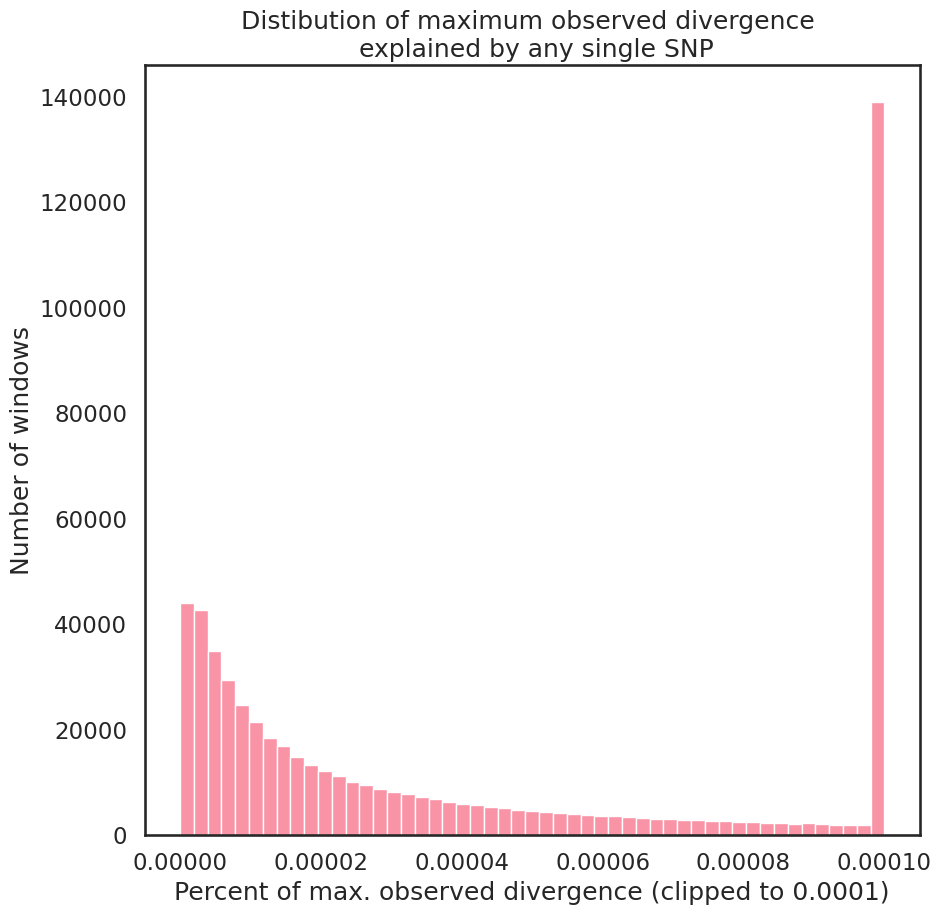

In [82]:
all_percs_clip = np.array(all_percs).clip(0,.00010)

plt.figure(figsize=(10,10))
sns.histplot(all_percs_clip)
plt.title('Distibution of maximum observed divergence \n explained by any single SNP')
plt.xlabel('Percent of max. observed divergence (clipped to 0.0001)')
plt.ylabel('Number of windows')

Text(0, 0.5, 'Number of windows')

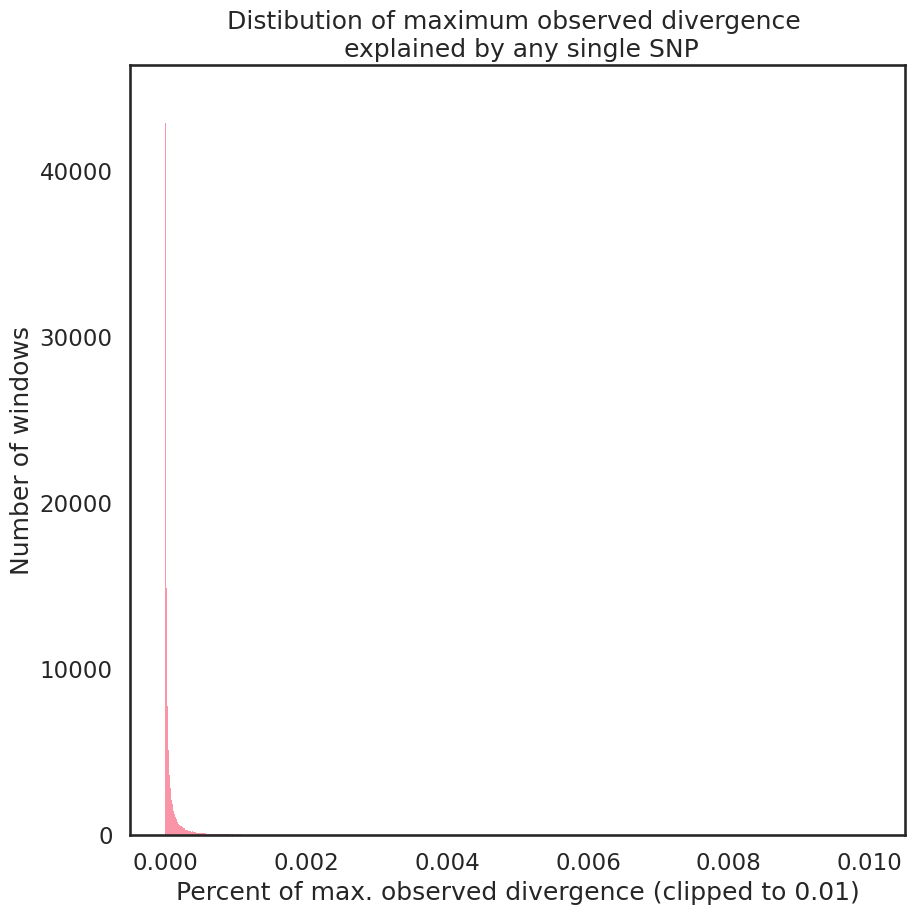

In [84]:
all_percs_clip = np.array(all_percs).clip(0,.010)

plt.figure(figsize=(10,10))
sns.histplot(all_percs_clip)
plt.title('Distibution of maximum observed divergence \n explained by any single SNP')
plt.xlabel('Percent of max. observed divergence (clipped to 0.01)')
plt.ylabel('Number of windows')

In [86]:
h = ism_dict[('chr1', 41418752)]['percent_of_max_observed']
plt.hist(h, range=(0,.00001), bins=100)
plt.title(('chr1',
  41418752))

KeyError: ('chr1', 41418752)

(array([81., 28., 11.,  5.,  9.,  3.,  6.,  4.,  1.,  0.,  0.,  1.,  2.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,
         0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([1.1000e-05, 2.0890e-05, 3.0780e-05, 4.0670e-05, 5.0560e-05,
        6.0450e-05, 7.0340e-05, 8.0230e-05, 9.0120e-05, 1.0001e-04,
        1.0990e-04, 1.1979e-04, 1.2968e-04, 1.3957e-04, 1.4946e-04,
        1.5935e-04, 1.6924e-04, 1.7913e-04, 1.8902e-04, 1.9891e-04,
        2.0880e-04, 2.1869e-04, 2.2858e-04, 2.3847e-04, 2.4836e-04,
        2.5825e-04, 2.6814e-04, 2.7803e-04, 2.8792e-04, 2.9781e-04,
        3.0770e-04, 3.1759

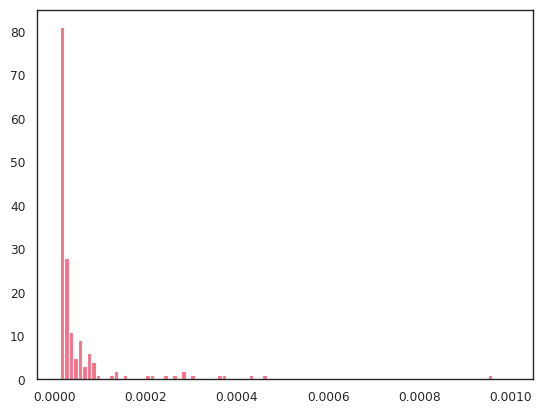

In [ ]:
h = ism_dict[('chr1',
  41418752)]['percent_of_max_observed']
plt.hist(h, range=(.000011,.001), bins=100)

In [92]:
emp

NameError: name 'emp' is not defined

In [ ]:
emp['max_ism_div'] = max_divs

In [ ]:
emp['max_obs_div'] = anc_div.loc[emp.index].max(axis=1)
emp['med_obs_div'] = anc_div.loc[emp.index].median(axis=1)
#emp['max_obs_div'] = anc_div.loc[emp.index].max(axis=1)

Text(0.5, 1.0, 'Maximum 3D divergence per window')

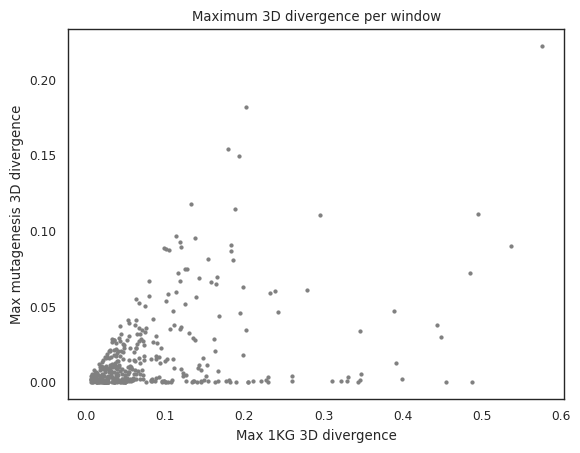

In [ ]:
plt.scatter(emp['max_obs_div'], emp['max_ism_div'], s=5, color='grey')
plt.xlabel('Max 1KG 3D divergence')
plt.ylabel('Max mutagenesis 3D divergence')
plt.title('Maximum 3D divergence per window')

Text(0.5, 1.0, 'Maximum 3D divergence per window')

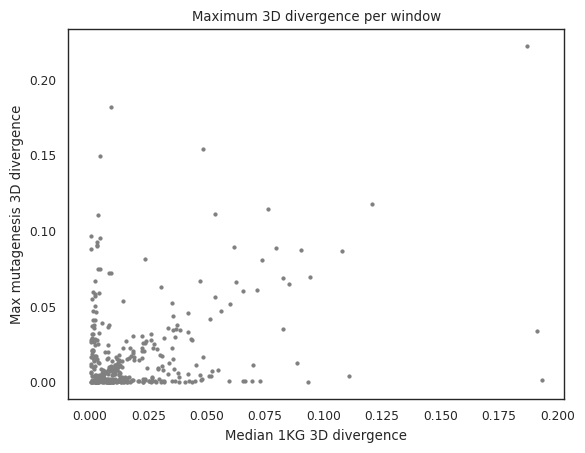

In [ ]:
plt.scatter(emp['med_obs_div'], emp['max_ism_div'], s=5, color='grey')
plt.xlabel('Median 1KG 3D divergence')
plt.ylabel('Max mutagenesis 3D divergence')
plt.title('Maximum 3D divergence per window')

In [ ]:
emp['percent_of_max'] = emp['max_ism_div'] / emp['max_obs_div']
emp['percent_of_med'] = emp['max_ism_div'] / emp['med_obs_div']

In [96]:
len(all_percs)

93225

In [101]:
idw_short_list = idw_list.loc[ism_dict.keys()]
idw_short_list['percent_of_max'] = max_divs

In [106]:
idw_list.sort_values(by=('max_div'), ascending=False)

,vcf_col_id,chr,window_start,window_end,individual,max_div,max_comp
"(chr3, 168820736)",66,chr3,168820736,169869312,AFR_MSL_female_HG03086,0.004775,SAS_GIH_female_NA20896
"(chr1, 73400320)",66,chr1,73400320,74448896,AFR_MSL_female_HG03086,0.004775,SAS_GIH_female_NA20896
"(chr5, 76021760)",66,chr5,76021760,77070336,AFR_MSL_female_HG03086,0.004775,SAS_GIH_female_NA20896
"(chr9, 76546048)",66,chr9,76546048,77594624,AFR_MSL_female_HG03086,0.004775,SAS_GIH_female_NA20896
"(chr10, 66584576)",66,chr10,66584576,67633152,AFR_MSL_female_HG03086,0.004775,SAS_GIH_female_NA20896
...,...,...,...,...,...,...,...
"(chr4, 151519232)",25,chr4,151519232,152567808,AMR_PUR_female_HG01198,0.004068,AFR_MSL_female_HG03575
"(chr9, 16777216)",25,chr9,16777216,17825792,AMR_PUR_female_HG01198,0.004068,AFR_MSL_female_HG03575
"(chr21, 29360128)",25,chr21,29360128,30408704,AMR_PUR_female_HG01198,0.004068,AFR_MSL_female_HG03575
"(chr17, 524288)",25,chr17,524288,1572864,AMR_PUR_female_HG01198,0.004068,AFR_MSL_female_HG03575


In [105]:
idw_short_list.sort_values(by=('max_div'), ascending=False)

,vcf_col_id,chr,window_start,window_end,individual,max_div,max_comp,percent_of_max
"(chr4, 107479040)",134,chr4,107479040,108527616,SAS_GIH_female_NA20896,0.004775,AFR_MSL_female_HG03086,5.311792e-03
"(chr1, 73400320)",66,chr1,73400320,74448896,AFR_MSL_female_HG03086,0.004775,SAS_GIH_female_NA20896,3.568660e-06
"(chr5, 76021760)",66,chr5,76021760,77070336,AFR_MSL_female_HG03086,0.004775,SAS_GIH_female_NA20896,5.154802e-07
"(chr8, 73400320)",66,chr8,73400320,74448896,AFR_MSL_female_HG03086,0.004775,SAS_GIH_female_NA20896,3.220971e-06
"(chr8, 20971520)",47,chr8,20971520,22020096,AMR_PEL_female_HG02147,0.004770,AFR_MSL_female_HG03086,4.292991e-05
...,...,...,...,...,...,...,...,...
"(chr5, 57671680)",63,chr5,57671680,58720256,AFR_GWD_female_HG02888,0.004178,AFR_MSL_female_HG03086,1.823664e-04
"(chr11, 47185920)",5,chr11,47185920,48234496,EUR_GBR_female_HG00130,0.004178,AFR_MSL_female_HG03583,8.408236e-07
"(chr8, 141557760)",22,chr8,141557760,142606336,AMR_CLM_female_HG01125,0.004119,AFR_MSL_female_HG03086,6.585545e-06
"(chr3, 70778880)",22,chr3,70778880,71827456,AMR_CLM_female_HG01125,0.004119,AFR_MSL_female_HG03086,9.495306e-07


Text(0.5, 0, 'Percent of maximum observed divergence')

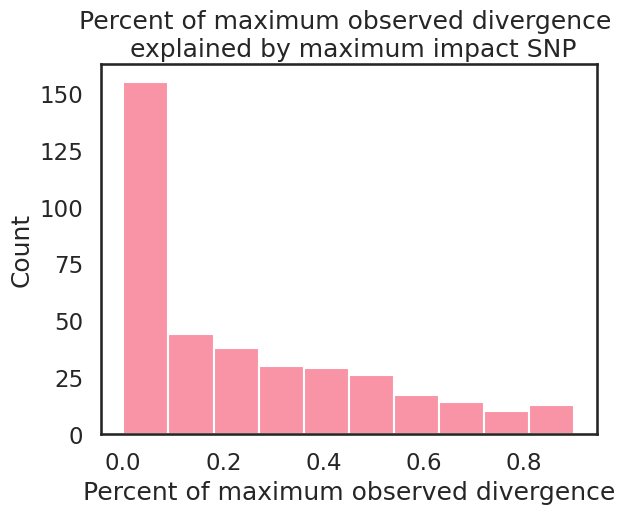

In [ ]:
sns.histplot(emp['percent_of_max'])
plt.title('Percent of maximum observed divergence \n explained by maximum impact SNP')
plt.xlabel('Percent of maximum observed divergence')

Text(0.5, 1.0, 'x axis cut off at 2, (maximum is ~152)')

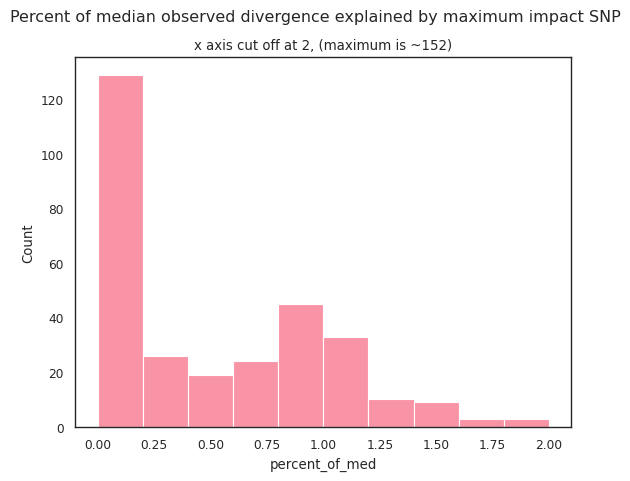

In [ ]:
sns.histplot(emp['percent_of_med'], binrange=(0,2))
plt.suptitle('Percent of median observed divergence explained by maximum impact SNP')
plt.title('x axis cut off at 2, (maximum is ~152)')

(array([155.,  44.,  38.,  30.,  29.,  26.,  17.,  14.,  10.,  13.]),
 array([1.31100009e-04, 9.01676492e-02, 1.80204198e-01, 2.70240748e-01,
        3.60277297e-01, 4.50313846e-01, 5.40350395e-01, 6.30386944e-01,
        7.20423494e-01, 8.10460043e-01, 9.00496592e-01]),
 <BarContainer object of 10 artists>)

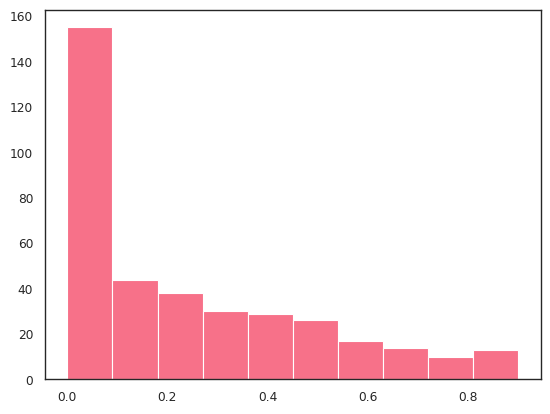

In [ ]:
plt.hist(emp['percent_of_max'], align = 'mid')

(array([155.,  44.,  38.,  30.,  29.,  26.,  17.,  14.,  10.,  13.]),
 array([1.31100009e-04, 9.01676492e-02, 1.80204198e-01, 2.70240748e-01,
        3.60277297e-01, 4.50313846e-01, 5.40350395e-01, 6.30386944e-01,
        7.20423494e-01, 8.10460043e-01, 9.00496592e-01]),
 <BarContainer object of 10 artists>)

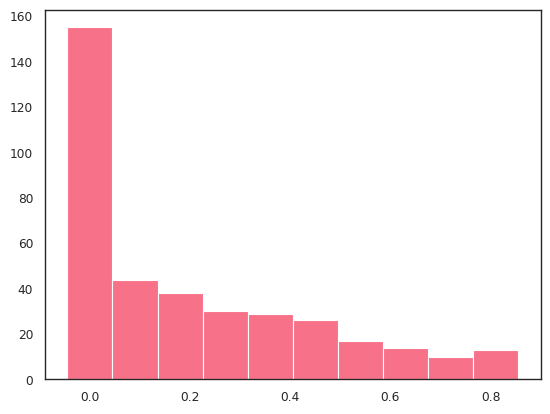

In [ ]:
plt.hist(emp['percent_of_max'], align = 'left')

(array([155.,  44.,  38.,  30.,  29.,  26.,  17.,  14.,  10.,  13.]),
 array([1.31100009e-04, 9.01676492e-02, 1.80204198e-01, 2.70240748e-01,
        3.60277297e-01, 4.50313846e-01, 5.40350395e-01, 6.30386944e-01,
        7.20423494e-01, 8.10460043e-01, 9.00496592e-01]),
 <BarContainer object of 10 artists>)

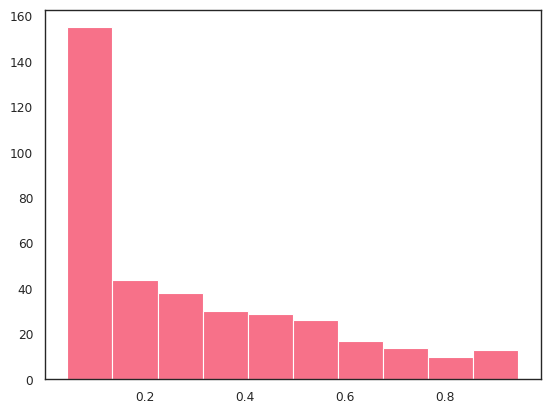

In [ ]:
plt.hist(emp['percent_of_max'], align = 'right')

## Additive effects

In [ ]:
ism_dict[('chr1',
  41418752)]['1-spearman'].sum()

0.015445614110028547

In [ ]:
emp

ttest_stat     ttest_pval  obs_mean  exp_mean   obs/exp  \
chr   windowStartPos                                                            
chr1  41418752        -26.987165  1.461871e-143  0.011143  0.003190  3.492743   
      57147392        -11.867927   9.060743e-32  0.021517  0.007885  2.728665   
      70778880         -5.334215   1.032114e-07  0.003761  0.002849  1.319976   
      88604672        -17.578602   7.272380e-66  0.014955  0.002522  5.929643   
      92798976        -16.384539   8.147811e-58  0.071182  0.008426  8.447434   
...                          ...            ...       ...       ...       ...   
chr21 35127296         -8.395653   7.093248e-17  0.030532  0.022997  1.327648   
chr22 22020096        -10.467888   3.332675e-25  0.023887  0.017606  1.356793   
      22544384         -9.387509   1.188089e-20  0.011776  0.007743  1.520958   
      47710208        -26.485256  7.297025e-139  0.055388  0.020211  2.740559   
      48234496        -55.442420   0.000000e+00  0.204145  0.035823  5.698711   

                       obs-exp   -log10(p) direction   sig  numWindowsAbove  \
chr   windowStartPos                                                          
chr1  41418752        0.007953  142.835091    higher  True                2   
      57147392        0.013631   31.042836    higher  True                1   
      70778880        0.000912    6.986272    higher  True                0   
      88604672        0.012433   65.138323    higher  True                7   
      92798976        0.062755   57.088959    higher  True                0   
...                        ...         ...       ...   ...              ...   
chr21 35127296        0.007535   16.149155    higher  True                0   
chr22 22020096        0.006282   24.477207    higher  True                0   
      22544384        0.004034   19.925151    higher  True                0   
      47710208        0.035178  138.136854    higher  True                0   
      48234496        0.168322         inf    higher  True              367   

                      ...       AMR       min       max   emp_min   emp_max  \
chr   windowStartPos  ...                                                     
chr1  41418752        ...  0.008076  0.000214  0.061708  0.000240  0.047160   
      57147392        ...  0.036207  0.000460  0.241914  0.000711  0.198873   
      70778880        ...  0.003891  0.000125  0.015220  0.000125  0.071377   
      88604672        ...  0.014783  0.000098  0.068938  0.000080  0.055810   
      92798976        ...  0.074693  0.000381  0.260017  0.000371  0.454930   
...                   ...       ...       ...       ...       ...       ...   
chr21 35127296        ...  0.030236  0.008522  0.120146  0.001044  0.323117   
chr22 22020096        ...  0.022474  0.001957  0.055087  0.001038  0.190579   
      22544384        ...  0.009572  0.000380  0.032310  0.000370  0.141347   
      47710208        ...  0.059584  0.001600  0.142327  0.001173  0.203276   
      48234496        ...  0.219469  0.002814  0.346398  0.002023  0.280502   

                      max_ism_div  max_obs_div  med_obs_div  percent_of_max  \
chr   windowStartPos                                                          
chr1  41418752           0.013818     0.061708     0.013622        0.223924   
      57147392           0.046179     0.241914     0.002589        0.190889   
      70778880           0.004463     0.015220     0.003781        0.293259   
      88604672           0.028706     0.068938     0.000810        0.416400   
      92798976           0.000728     0.260017     0.001733        0.002798   
...                           ...          ...          ...             ...   
chr21 35127296           0.008852     0.120146     0.029215        0.073674   
chr22 22020096           0.009399     0.055087     0.024408        0.170624   
      22544384           0.006354     0.032310     0.012853        0.196670   
      47710208           0.011125     0.142

In [ ]:
additive = []
for w in ism_dict.keys():
    additive.append(ism_dict[w]['1-spearman'].sum())

In [ ]:
emp['ism_sum'] = additive

In [ ]:
emp['additive_percent_of_max'] = emp['ism_sum'] / emp['max_obs_div']

Text(0.5, 0, 'Percent of maximum observed divergence')

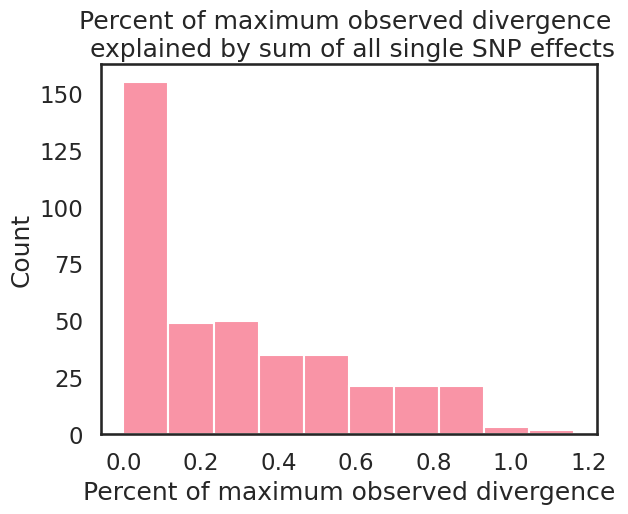

In [ ]:
sns.histplot(emp['additive_percent_of_max'])
plt.title('Percent of maximum observed divergence \n explained by sum of all single SNP effects')
plt.xlabel('Percent of maximum observed divergence')

## Annotate 3D disrupting variants

### ID disrupting variants

In [ ]:
emp

ttest_stat     ttest_pval  obs_mean  exp_mean   obs/exp  \
chr   windowStartPos                                                            
chr1  41418752        -26.987165  1.461871e-143  0.011143  0.003190  3.492743   
      57147392        -11.867927   9.060743e-32  0.021517  0.007885  2.728665   
      70778880         -5.334215   1.032114e-07  0.003761  0.002849  1.319976   
      88604672        -17.578602   7.272380e-66  0.014955  0.002522  5.929643   
      92798976        -16.384539   8.147811e-58  0.071182  0.008426  8.447434   
...                          ...            ...       ...       ...       ...   
chr21 35127296         -8.395653   7.093248e-17  0.030532  0.022997  1.327648   
chr22 22020096        -10.467888   3.332675e-25  0.023887  0.017606  1.356793   
      22544384         -9.387509   1.188089e-20  0.011776  0.007743  1.520958   
      47710208        -26.485256  7.297025e-139  0.055388  0.020211  2.740559   
      48234496        -55.442420   0.000000e+00  0.204145  0.035823  5.698711   

                       obs-exp   -log10(p) direction   sig  numWindowsAbove  \
chr   windowStartPos                                                          
chr1  41418752        0.007953  142.835091    higher  True                2   
      57147392        0.013631   31.042836    higher  True                1   
      70778880        0.000912    6.986272    higher  True                0   
      88604672        0.012433   65.138323    higher  True                7   
      92798976        0.062755   57.088959    higher  True                0   
...                        ...         ...       ...   ...              ...   
chr21 35127296        0.007535   16.149155    higher  True                0   
chr22 22020096        0.006282   24.477207    higher  True                0   
      22544384        0.004034   19.925151    higher  True                0   
      47710208        0.035178  138.136854    higher  True                0   
      48234496        0.168322         inf    higher  True              367   

                      ...       AMR       min       max   emp_min   emp_max  \
chr   windowStartPos  ...                                                     
chr1  41418752        ...  0.008076  0.000214  0.061708  0.000240  0.047160   
      57147392        ...  0.036207  0.000460  0.241914  0.000711  0.198873   
      70778880        ...  0.003891  0.000125  0.015220  0.000125  0.071377   
      88604672        ...  0.014783  0.000098  0.068938  0.000080  0.055810   
      92798976        ...  0.074693  0.000381  0.260017  0.000371  0.454930   
...                   ...       ...       ...       ...       ...       ...   
chr21 35127296        ...  0.030236  0.008522  0.120146  0.001044  0.323117   
chr22 22020096        ...  0.022474  0.001957  0.055087  0.001038  0.190579   
      22544384        ...  0.009572  0.000380  0.032310  0.000370  0.141347   
      47710208        ...  0.059584  0.001600  0.142327  0.001173  0.203276   
      48234496        ...  0.219469  0.002814  0.346398  0.002023  0.280502   

                      max_ism_div  max_obs_div  med_obs_div  percent_of_max  \
chr   windowStartPos                                                          
chr1  41418752           0.013818     0.061708     0.013622        0.223924   
      57147392           0.046179     0.241914     0.002589        0.190889   
      70778880           0.004463     0.015220     0.003781        0.293259   
      88604672           0.028706     0.068938     0.000810        0.416400   
      92798976           0.000728     0.260017     0.001733        0.002798   
...                           ...          ...          ...             ...   
chr21 35127296           0.008852     0.120146     0.029215        0.073674   
chr22 22020096           0.009399     0.055087     0.024408        0.170624   
      22544384           0.006354     0.032310     0.012853        0.196670   
      47710208           0.011125     0.142

In [ ]:
ism_dict[('chr1',
  41418752)]

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman,percent_of_max_observed
0,chr1,41419194,41418752,G,A,4.010169e-10,1.528952e-09,2.227691e-09,3.610057e-08
1,chr1,41419903,41418752,T,A,6.424570e-10,2.430540e-09,4.395940e-09,7.123786e-08
2,chr1,41419982,41418752,G,A,2.975184e-10,9.618393e-10,2.712017e-09,4.394926e-08
3,chr1,41420026,41418752,T,C,1.394818e-10,4.707098e-10,1.339220e-09,2.170256e-08
4,chr1,41421729,41418752,G,A,1.894821e-10,7.112624e-10,1.574174e-09,2.551008e-08
...,...,...,...,...,...,...,...,...,...
1741,chr1,42465654,41418752,G,T,2.755102e-10,1.058228e-09,1.286805e-09,2.085315e-08
1742,chr1,42465656,41418752,C,T,1.067920e-10,4.187068e-10,7.180145e-10,1.163570e-08
1743,chr1,42465863,41418752,A,G,2.016804e-10,6.311963e-10,9.683133e-10,1.569188e-08
1744,chr1,42466665,41418752,C,T,8.591350e-10,3.369644e-09,4.139793e-09,6.708690e-08


In [ ]:
w = ('chr1',
  41418752)

In [ ]:
emp

ttest_stat     ttest_pval  obs_mean  exp_mean   obs/exp  \
chr   windowStartPos                                                            
chr1  41418752        -26.987165  1.461871e-143  0.011143  0.003190  3.492743   
      57147392        -11.867927   9.060743e-32  0.021517  0.007885  2.728665   
      70778880         -5.334215   1.032114e-07  0.003761  0.002849  1.319976   
      88604672        -17.578602   7.272380e-66  0.014955  0.002522  5.929643   
      92798976        -16.384539   8.147811e-58  0.071182  0.008426  8.447434   
...                          ...            ...       ...       ...       ...   
chr21 35127296         -8.395653   7.093248e-17  0.030532  0.022997  1.327648   
chr22 22020096        -10.467888   3.332675e-25  0.023887  0.017606  1.356793   
      22544384         -9.387509   1.188089e-20  0.011776  0.007743  1.520958   
      47710208        -26.485256  7.297025e-139  0.055388  0.020211  2.740559   
      48234496        -55.442420   0.000000e+00  0.204145  0.035823  5.698711   

                       obs-exp   -log10(p) direction   sig  numWindowsAbove  \
chr   windowStartPos                                                          
chr1  41418752        0.007953  142.835091    higher  True                2   
      57147392        0.013631   31.042836    higher  True                1   
      70778880        0.000912    6.986272    higher  True                0   
      88604672        0.012433   65.138323    higher  True                7   
      92798976        0.062755   57.088959    higher  True                0   
...                        ...         ...       ...   ...              ...   
chr21 35127296        0.007535   16.149155    higher  True                0   
chr22 22020096        0.006282   24.477207    higher  True                0   
      22544384        0.004034   19.925151    higher  True                0   
      47710208        0.035178  138.136854    higher  True                0   
      48234496        0.168322         inf    higher  True              367   

                      ...       AMR       min       max   emp_min   emp_max  \
chr   windowStartPos  ...                                                     
chr1  41418752        ...  0.008076  0.000214  0.061708  0.000240  0.047160   
      57147392        ...  0.036207  0.000460  0.241914  0.000711  0.198873   
      70778880        ...  0.003891  0.000125  0.015220  0.000125  0.071377   
      88604672        ...  0.014783  0.000098  0.068938  0.000080  0.055810   
      92798976        ...  0.074693  0.000381  0.260017  0.000371  0.454930   
...                   ...       ...       ...       ...       ...       ...   
chr21 35127296        ...  0.030236  0.008522  0.120146  0.001044  0.323117   
chr22 22020096        ...  0.022474  0.001957  0.055087  0.001038  0.190579   
      22544384        ...  0.009572  0.000380  0.032310  0.000370  0.141347   
      47710208        ...  0.059584  0.001600  0.142327  0.001173  0.203276   
      48234496        ...  0.219469  0.002814  0.346398  0.002023  0.280502   

                      max_ism_div  max_obs_div  med_obs_div  percent_of_max  \
chr   windowStartPos                                                          
chr1  41418752           0.013818     0.061708     0.013622        0.223924   
      57147392           0.046179     0.241914     0.002589        0.190889   
      70778880           0.004463     0.015220     0.003781        0.293259   
      88604672           0.028706     0.068938     0.000810        0.416400   
      92798976           0.000728     0.260017     0.001733        0.002798   
...                           ...          ...          ...             ...   
chr21 35127296           0.008852     0.120146     0.029215        0.073674   
chr22 22020096           0.009399     0.055087     0.024408        0.170624   
      22544384           0.006354     0.032310     0.012853        0.196670   
      47710208           0.011125     0.142

In [ ]:
ism

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman
0,chr1,41419194,41418752,G,A,4.010169e-10,1.528952e-09,2.227691e-09
1,chr1,41419903,41418752,T,A,6.424570e-10,2.430540e-09,4.395940e-09
2,chr1,41419982,41418752,G,A,2.975184e-10,9.618393e-10,2.712017e-09
3,chr1,41420026,41418752,T,C,1.394818e-10,4.707098e-10,1.339220e-09
4,chr1,41421729,41418752,G,A,1.894821e-10,7.112624e-10,1.574174e-09
...,...,...,...,...,...,...,...,...
721717,chr9,125819519,124780544,C,G,6.015042e-09,1.393339e-08,1.644450e-08
721718,chr9,125821620,124780544,G,A,2.798776e-09,6.660611e-09,1.031697e-08
721719,chr9,125824208,124780544,A,T,2.335459e-10,5.788691e-10,1.391949e-09
721720,chr9,125824786,124780544,C,T,2.315557e-09,5.479565e-09,6.564956e-09


In [ ]:
# ism variant is more disruptive than median observed individual divergence
mod_vars = pd.DataFrame(columns = ism.columns)
for w in ism_dict.keys():
    df = ism_dict[w]
    em = emp.loc[w].med_obs_div
    df = df[df['1-spearman'] > em]
    if df.shape[0] != 0:
        mod_vars = pd.concat([mod_vars, df])
mod_vars

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman,percent_of_max_observed
934,chr1,41924264,41418752,G,A,0.002050,0.007383,0.013818,0.223924
3169,chr1,57835819,57147392,G,C,0.001049,0.032333,0.046179,0.190889
4891,chr1,71588165,70778880,G,C,0.000709,0.001443,0.004463,0.293259
6013,chr1,89085986,88604672,G,C,0.012915,0.018012,0.028706,0.416400
41997,chr1,207692807,207093760,T,G,0.001659,0.011808,0.014019,0.346031
...,...,...,...,...,...,...,...,...,...
407524,chr20,53099036,52428800,C,T,0.001304,0.060778,0.056723,0.714326
413921,chr21,19735128,19398656,T,A,0.001202,0.052344,0.081342,0.527366
418169,chr21,21751496,20971520,A,G,0.002042,0.028540,0.058876,0.253647
418170,chr21,21751496,21495808,A,G,0.001653,0.062862,0.072187,0.148892


In [ ]:
mod_vars = pd.DataFrame(columns = ism.columns)
for w in ism_dict.keys():
    df = ism_dict[w]
    df = df[df['percent_of_max_observed'] > .5]
    if df.shape[0] != 0:
        mod_vars = pd.concat([mod_vars, df])
mod_vars

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman,percent_of_max_observed
309441,chr2,18178938,17825792,C,T,0.005557,0.014375,0.016556,0.677029
312189,chr2,28155815,27262976,C,T,0.009965,0.017268,0.026854,0.830247
312190,chr2,28155815,27787264,C,T,0.019031,0.053049,0.096345,0.848726
319313,chr2,35858407,35127296,A,G,0.010148,0.169487,0.154261,0.862917
319314,chr2,35858407,35651584,A,G,0.007491,0.054273,0.058001,0.557110
...,...,...,...,...,...,...,...,...,...
395166,chr20,12661100,12058624,A,T,0.001295,0.008427,0.027543,0.529449
400472,chr20,38790643,38273024,C,T,0.019338,0.046760,0.053516,0.530156
402077,chr20,41572207,40894464,G,C,0.008765,0.026429,0.029039,0.684638
407524,chr20,53099036,52428800,C,T,0.001304,0.060778,0.056723,0.714326


In [ ]:
mod_vars = pd.DataFrame(columns = ism.columns)
for w in ism_dict.keys():
    df = ism_dict[w]
    df = df[df['percent_of_max_observed'] > .2]
    if df.shape[0] != 0:
        mod_vars = pd.concat([mod_vars, df])
mod_vars

,chr,pos,window,ref,alt,mse,1-pearson,1-spearman,percent_of_max_observed
934,chr1,41924264,41418752,G,A,0.002050,0.007383,0.013818,0.223924
4891,chr1,71588165,70778880,G,C,0.000709,0.001443,0.004463,0.293259
6013,chr1,89085986,88604672,G,C,0.012915,0.018012,0.028706,0.416400
10056,chr1,97870773,96993280,G,A,0.000861,0.013771,0.016971,0.391997
10057,chr1,97870773,97517568,G,A,0.001004,0.008537,0.010392,0.333523
...,...,...,...,...,...,...,...,...,...
402077,chr20,41572207,40894464,G,C,0.008765,0.026429,0.029039,0.684638
407524,chr20,53099036,52428800,C,T,0.001304,0.060778,0.056723,0.714326
413921,chr21,19735128,19398656,T,A,0.001202,0.052344,0.081342,0.527366
418169,chr21,21751496,20971520,A,G,0.002042,0.028540,0.058876,0.253647


In [ ]:
mod_vars['pos+1'] = mod_vars['pos'] +1
mod_vars = mod_vars[['chr','pos', 'pos+1','window','ref','alt','percent_of_max_observed']]

### genomic annotations

In [ ]:
ctcf = pybedtools.BedTool('%s/annotations/ctcf_full_merged.bed' % DATA_PATH).merge()
genes = pybedtools.BedTool('%s/annotations/grch38_gene_annotations.bed' % DATA_PATH)

In [ ]:
mod_vars_annot = BedTool.from_dataframe(mod_vars).intersect(ctcf, wao=True).to_dataframe(disable_auto_names=True, header=None)
mod_vars_annot.columns = list(mod_vars.columns) + ['elem_chr','elem_start','elem_stop','ctcf']
mod_vars_annot = mod_vars_annot[list(mod_vars.columns) + ['ctcf']]

mod_vars_annot = BedTool.from_dataframe(mod_vars_annot).intersect(genes, wao=True).to_dataframe(disable_auto_names=True, header=None)
mod_vars_annot.columns = list(mod_vars.columns) + ['ctcf'] + ['elem_chr','elem_start','elem_stop','gene_name','genes']
mod_vars_annot = mod_vars_annot[list(mod_vars.columns) + ['ctcf', 'gene_name','genes']]
mod_vars_annot = mod_vars_annot.drop_duplicates(subset = list(mod_vars.columns), ignore_index=True)

phylop=pd.read_table('phylop.txt')
mod_vars_annot['phylop'] = phylop['Mean']


Text(0.5, 1.0, 'PhyloP Score distribution for 3D modifying SNPs')

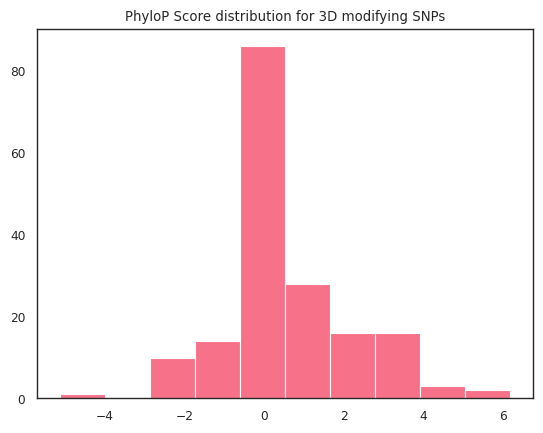

In [ ]:
plt.hist(mod_vars_annot['phylop'])
plt.title('PhyloP Score distribution for 3D modifying SNPs')

In [ ]:
mod_vars_annot[mod_vars_annot.ctcf==1].shape

(17, 11)

In [ ]:
mod_vars_annot[mod_vars_annot.phylop>0]

,chr,pos,pos+1,window,ref,alt,percent_of_max_observed,ctcf,gene_name,genes,phylop
0,chr1,41924264,41924265,41418752,G,A,0.223924,0,.,0,0.387512
1,chr1,71588165,71588166,70778880,G,C,0.293259,0,NEGR1,1,2.035560
2,chr1,89085986,89085987,88604672,G,C,0.416400,0,.,0,0.225583
3,chr1,97870773,97870774,96993280,G,A,0.391997,0,DPYD,1,6.199230
4,chr1,97870773,97870774,97517568,G,A,0.333523,0,DPYD,1,6.199230
...,...,...,...,...,...,...,...,...,...,...,...
168,chr20,12661100,12661101,12582912,A,T,0.240413,0,.,0,0.108244
169,chr20,35145275,35145276,34603008,T,C,0.424265,0,EDEM2,1,0.802858
170,chr20,38790643,38790644,38273024,C,T,0.530156,0,.,0,0.944268
171,chr20,41572207,41572208,40894464,G,C,0.684638,0,CHD6,1,1.619590


In [ ]:
mod_vars_annot[mod_vars_annot.phylop<0]

,chr,pos,pos+1,window,ref,alt,percent_of_max_observed,ctcf,gene_name,genes,phylop
10,chr2,13845356,13845357,13107200,T,G,0.236353,0,.,0,-0.635118
11,chr2,13845356,13845357,13631488,T,G,0.426936,0,.,0,-0.635118
12,chr2,15226104,15226105,14680064,G,C,0.395750,0,NBAS,1,-0.109669
16,chr2,35634697,35634698,35127296,T,C,0.267824,0,.,0,-0.539118
17,chr2,35858407,35858408,35127296,A,G,0.862917,0,.,0,-0.300252
...,...,...,...,...,...,...,...,...,...,...,...
164,chr20,3313837,3313838,2621440,C,T,0.411045,0,C20orf194,1,-0.401669
165,chr20,3313837,3313838,3145728,C,T,0.583223,0,C20orf194,1,-0.401669
172,chr20,53099036,53099037,52428800,C,T,0.714326,0,TSHZ2,1,-0.038354
174,chr21,21751496,21751497,20971520,A,G,0.253647,0,.,0,-0.011937


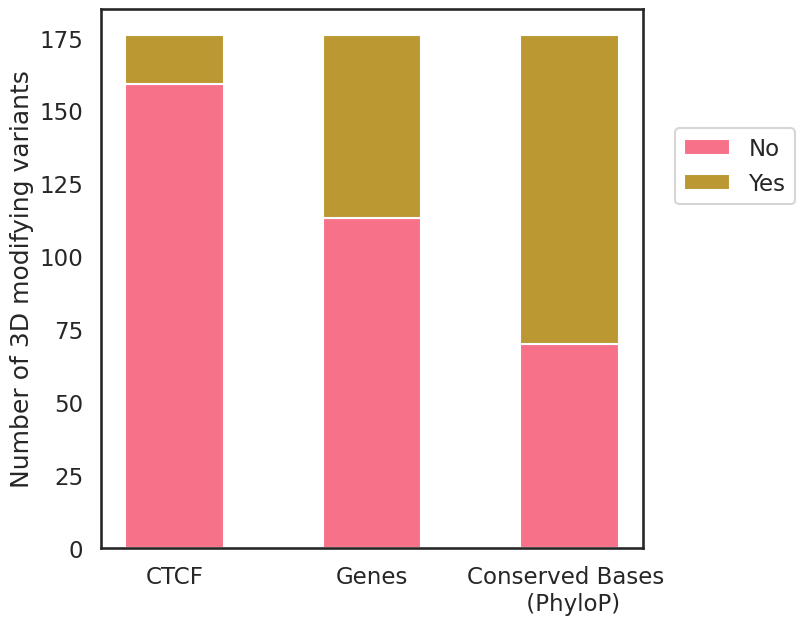

In [ ]:
annots = ['CTCF','Genes', 'Conserved Bases \n (PhyloP)']
#1 = conserved phylop> 0 , 0 = fast evolving, phylop<0
annot_counts = {'No':[159, 113,70 ], 'Yes': [17,63, 106]}

width = 0.5

fig, ax = plt.subplots(figsize=(7,7))
bottom = np.zeros(3)

for boolean, annot_counts in annot_counts.items():
    p = ax.bar(annots, annot_counts, width, label=boolean, bottom=bottom)
    bottom += annot_counts

plt.ylabel('Number of 3D modifying variants')
ax.legend(loc="best", bbox_to_anchor=(.8, 0., 0.5, 0.8))



plt.show()

In [ ]:
mod_vars_annot

,chr,pos,pos+1,window,ref,alt,percent_of_max_observed,ctcf,gene_name,genes,phylop
0,chr1,41924264,41924265,41418752,G,A,0.223924,0,.,0,0.387512
1,chr1,71588165,71588166,70778880,G,C,0.293259,0,NEGR1,1,2.035560
2,chr1,89085986,89085987,88604672,G,C,0.416400,0,.,0,0.225583
3,chr1,97870773,97870774,96993280,G,A,0.391997,0,DPYD,1,6.199230
4,chr1,97870773,97870774,97517568,G,A,0.333523,0,DPYD,1,6.199230
...,...,...,...,...,...,...,...,...,...,...,...
171,chr20,41572207,41572208,40894464,G,C,0.684638,0,CHD6,1,1.619590
172,chr20,53099036,53099037,52428800,C,T,0.714326,0,TSHZ2,1,-0.038354
173,chr21,19735128,19735129,19398656,T,A,0.527366,0,.,0,0.415480
174,chr21,21751496,21751497,20971520,A,G,0.253647,0,.,0,-0.011937


<AxesSubplot: xlabel='percent_of_max_observed', ylabel='ctcf'>

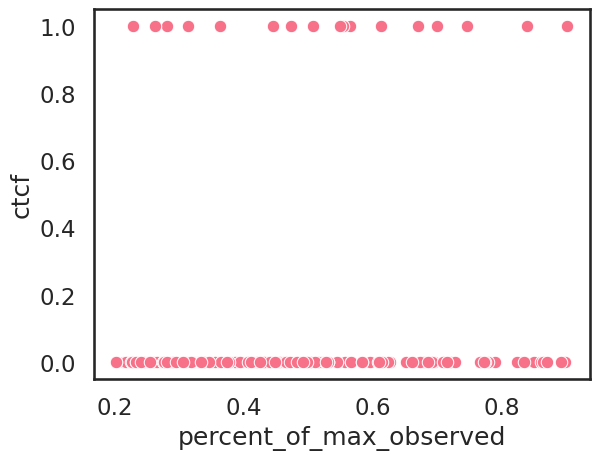

In [ ]:
sns.scatterplot(x='percent_of_max_observed',y = 'ctcf', data = mod_vars_annot)

In [ ]:
def PercentileToQuantile(x, bins):
    numQuants = bins
    quantSize = 1/numQuants
    currentQuant = quantSize
    currentReturn = 1
    numDecs = int(str(quantSize)[::-1].find('.'))
    for i in range(numQuants):
        if x < currentQuant:
            return currentReturn
        elif x == 1:
            return numQuants
        else:
            currentQuant = round((currentQuant + quantSize), numDecs)
            currentReturn += 1


def QuantAnnotate(distStat_df, annot_data, annot_type, quant_bins, metric):
    regions = distStat_df.copy(deep=True)
    regions['divergence_percentile'] = regions[metric].rank(pct=True)
    regions = regions.reset_index()
    regions['divergence_percentile_group'] = regions['divergence_percentile'].apply(PercentileToQuantile, bins=quant_bins)
    regions['stop'] = regions['pos'] + 2**20
    regions = regions[['chr','pos','stop',metric,'divergence_percentile','divergence_percentile_group']]
    regions.columns = ['chr','start','stop'] + list(regions.columns)[3:]
    region_list = regions[['chr','start','stop', 'divergence_percentile_group',metric]]

    if annot_type == 'genes':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','gene_name','numBases']
        annotation['annot_count'] = 1
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group', metric], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','annot_count':'sum', 'divergence_percentile_group':'max', metric:'mean'})
        annotation_grouped['propBasesCovered'] = annotation_grouped['numBases']/(2**20)
        annotation_grouped= annotation_grouped.reset_index()

    if annot_type=='ctcf':
        annotation = BedTool.from_dataframe(regions).intersect(annot_data, wo=True).to_dataframe(disable_auto_names=True, header=None)
        annotation.columns = list(regions.columns) + ['elem_chr','elem_start','elem_stop','numBases']
        annotation['annot_count'] = 1
        annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group', metric], how='outer')
        annotation_grouped = annotation.groupby(['chr', 'start','stop']).agg({'numBases': 'sum','annot_count':'sum', 'divergence_percentile_group':'max', metric:'mean'})
        annotation_grouped['propBasesCovered'] = annotation_grouped['numBases']/(2**20)
        annotation_grouped= annotation_grouped.reset_index()

    return annotation_grouped, regions

/scratch/egilbertson/ipykernel_17434/1919460459.py:40: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group', metric], how='outer')
/scratch/egilbertson/ipykernel_17434/1919460459.py:40: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group', metric], how='outer')


r2 =  0.02891983971947727 p = 0.04456109910013466


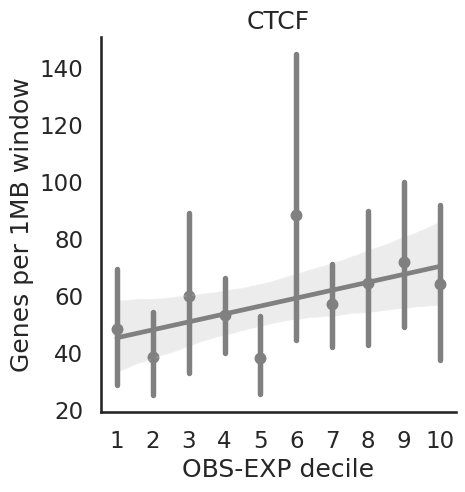

In [ ]:
#more divergent than expected
annotation, regions = QuantAnnotate(mod_vars, annot_data = ctcf, annot_type = 'ctcf', quant_bins=10, metric = 'percent_of_max_observed')
g = sns.lmplot(x='divergence_percentile_group', y='annot_count', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="OBS-EXP decile", ylabel="Genes per 1MB window", title='CTCF')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))
plt.show()

/scratch/egilbertson/ipykernel_17434/1919460459.py:31: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group', metric], how='outer')
/scratch/egilbertson/ipykernel_17434/1919460459.py:31: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  annotation = region_list.merge(annotation, on=['chr','start','stop', 'divergence_percentile_group', metric], how='outer')


r2 =  0.00788264881348578 p = 0.2968773757456605


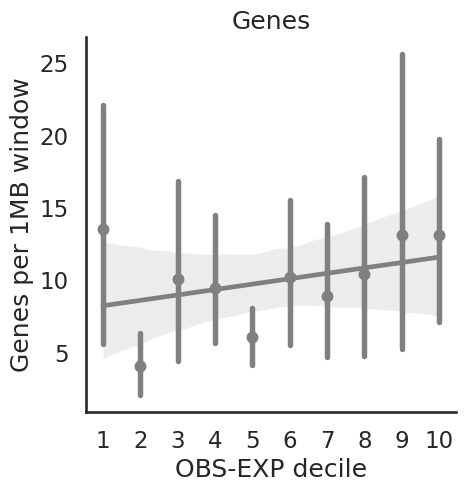

In [ ]:
#more divergent than expected
annotation, regions = QuantAnnotate(mod_vars, annot_data = genes, annot_type = 'genes', quant_bins=10, metric = 'percent_of_max_observed')
g = sns.lmplot(x='divergence_percentile_group', y='annot_count', data=annotation, x_estimator=np.mean, line_kws={'color': 'grey'}, scatter_kws={'color': 'grey'}, height=5)
g.set(xticks=[1,2,3,4,5,6,7,8,9,10],xlabel="OBS-EXP decile", ylabel="Genes per 1MB window", title='Genes')
slope, intercept, r_value, p_value, std_err = stats.linregress(annotation['divergence_percentile_group'],annotation['annot_count'])
print("r2 = ", str(r_value*r_value) + " p = " + str(p_value))
plt.show()